# Bank Marketing Analysis

##Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import seaborn as sns
import os
os.chdir(r"C:\Users\utkar\OneDrive\Desktop\Project")

##2.Read Data


In [5]:
# pip install bz2file

In [6]:
import bz2file as bz2

In [7]:
## This will show current working directory

# os.getcwd()


In [8]:
# Read the data from cvs into a Pandas DataFrame
data=pd.read_csv("bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


About this data

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution.
> 
Input variables:
> 
Age (Age of customer)
> 
Job (Job of customer)
> 
Martial (Martial status of customer)
>
Education (Customer education level)
>
Defaul (Has credit in default?)
>
Housing (If costumer has housing loan)
> 
Loan (Has Personal Loan)
>
Balance (Customer's individual balance)
>
Contact (Communication type)
>
Month (Last contact month of year)
>
Day (Last contact day of the week)
>
Duration (Last contact duration, in seconds,this attribute highly affects the output target (e.g., if duration=0 then y='no')
> 
Campaign (Number of contacts performed during this campaign and for this client)
>
Pdays (Number of days that passed by after the client was last contacted from a previous campaign)
>
Previous (Number of contacts performed before this campaign and for this client)
>
Poutcome (outcome of the previous marketing campaign)
> 
Deposit Y has the client subscribed a term deposit (binary: 'yes','no')

#Objective

Analyze data in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

#3.Data  review and checks

In [10]:
data0=data.copy() #shallow copy
print(data0.shape)

#shallow copy-->copy()-->do not change in original data
#deep copy--> deepcopy()--> will change in original data

(45211, 17)


This dataset has rows=45211 and columns=17

In [11]:
# Check data types in this dataset
numeric_col= list(data0.select_dtypes(np.number))
print(numeric_col)
print(len(numeric_col))
categorical_col= list(data0.select_dtypes(include= 'object'))
print((categorical_col))
print(len(categorical_col))

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
7
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
10


7--> numerical types

10--> categorical data types

In [12]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
# Handling duplicate values
data0.duplicated().sum()

0

There are no duplicate values


#Descriptive Analysis

Descriptive statistics are used to describe or summarize the characteristics of a sample or data set, such as a variable's mean, standard deviation, or median.

In [14]:
data0.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Below conclusion can be done based on data summary:**

Maximum age is 95 and minimum age is 18.

Minimum account balance of customer is in negative and maximum balance is 102127.

Maximum number of contacts performed during this campaign for perticular customer is 63 and minimum contact is 1.

Maximum number of days that passed by after the client was last contacted from a previous campaign is 871.

Number of contacts performed before this campaign for customer maximum is 275 and minimum is 0.

#Null Check

In [15]:
data0.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

*   There is no missing value present in data.
*   If missing values are present, we can handle missing values by dropping the missing records or by imputing the values.

**If missing values present in the data**

First Outlier Treatment and then Missing Data Imputation because the outliers will also influence the missing data algorithms in a negative manner.

#Handling Outliers


There are two type of outliers

Univariate Outliers: Univariate outliers are the data points whose values lie beyond the range of expected values based on one variable.

Multivariate Outliers: While ploting data, some values of one variable may not the beyond the expected range, but when you plot the datawith some other variable, these values may be lie far from the expected value.

##Outliers for age

In [16]:
## check the skewness of the data
data1= data0.copy()
data1.skew().sort_values()
#skew()-->Return unbiased skew over requested axis
# skew represent the asymentry of distribution around the mean

C:\Users\utkar\AppData\Local\Temp\ipykernel_8572\722425020.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1.skew().sort_values()


day          0.093079
age          0.684818
pdays        2.615715
duration     3.144318
campaign     4.898650
balance      8.360308
previous    41.846454
dtype: float64

<AxesSubplot:xlabel='age', ylabel='Density'>

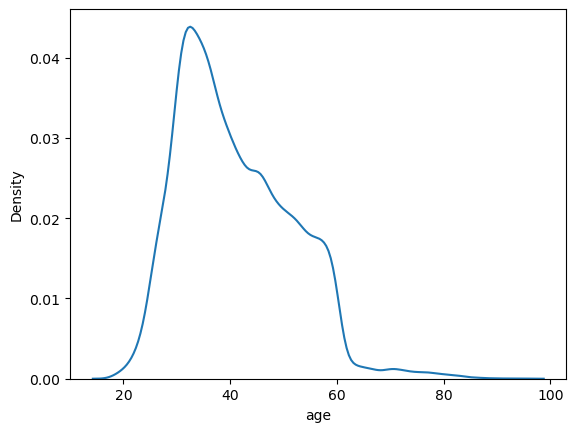

In [17]:
sns.kdeplot(data1["age"])

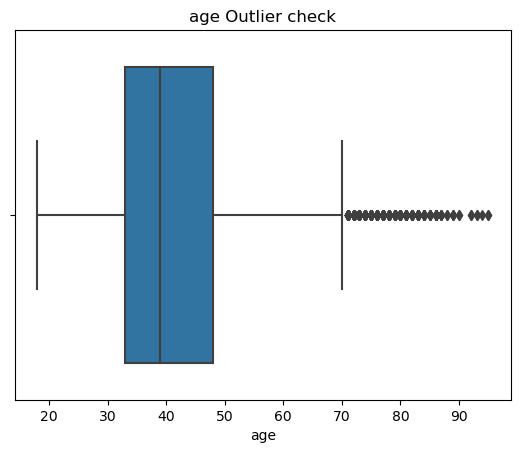

In [18]:
sns.boxplot(x=data1["age"])
plt.title("age Outlier check")
plt.show()

IQR on AGE


In [19]:
Qnt1=data1["age"].quantile(0.25) #25% of the customers have age less than Qnt1
Qnt3=data1["age"].quantile(0.75) #75% of the customers have age less than Qnt3

IQR=Qnt3-Qnt1
lw=Qnt1-1.5*IQR
up=Qnt3+1.5*IQR

In [20]:
print("Outlier percentage in Age :",((data1[data1["age"]>up].shape[0]+
                                      data1[data1["age"]<lw].shape[0])/data1.shape[0])*100)

Outlier percentage in Age : 1.0771714848156422


#Handling Outliers/Imputation

In this dataset age outliers percentage is 1.07%. So we can replace this data by upper bound limit.

In [21]:
## customers age more than upper bound are replaced with upper bound age
data1["age"]=np.where(data1["age"]>up,up,data1["age"])

#where(condition,if true: then apply this ,else:no change)

## customers age more than upper bound are replaced with upper bound age
data1["age"]=np.where(data1["age"]<lw,lw,data1["age"])

10.5 70.5


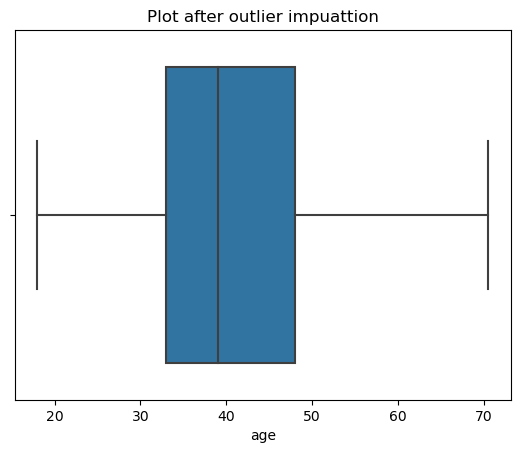

In [22]:
#after outliers imputation
print(lw,up)
sns.boxplot(x=data1["age"])
plt.title("Plot after outlier impuattion")
plt.show()


By analyzing the age column,we found that minimum age of customers is 18 and maximum age is 95.

We replace maximum age by upper bound of age i.e 70.5 is valid range to target customer for loan.

#Outliers for balance

<AxesSubplot:xlabel='balance', ylabel='Density'>

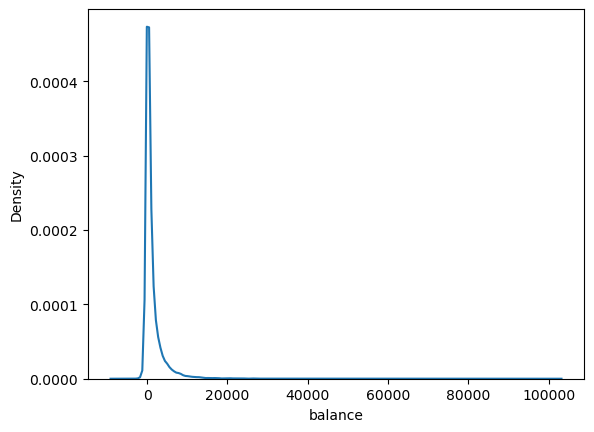

In [23]:
sns.kdeplot(data1["balance"])

In [24]:
print("Maximum balance:" ,data1['balance'].max())
print("Minimum balance:d" ,data1['balance'].min())
print("Negative balance percentage: ", len(data1[data1['balance']<0])/len(data1)*100)

Maximum balance: 102127
Minimum balance:d -8019
Negative balance percentage:  8.329831235761208


By the analyzing of balance column, we find 
that minimum account balance of customers is -8019 and maximum balance is 102127. And this is valid range so, balance column does not have outliers

Almost 8.3% customers have negative balance is an indicator that some customers have a loan account.

Negative balance==Loan Account 
Hence Need to handle outliers

#outliers for campaign

Campaign-->
Number of contacts performed during this campaign and for this client


<AxesSubplot:xlabel='campaign', ylabel='Density'>

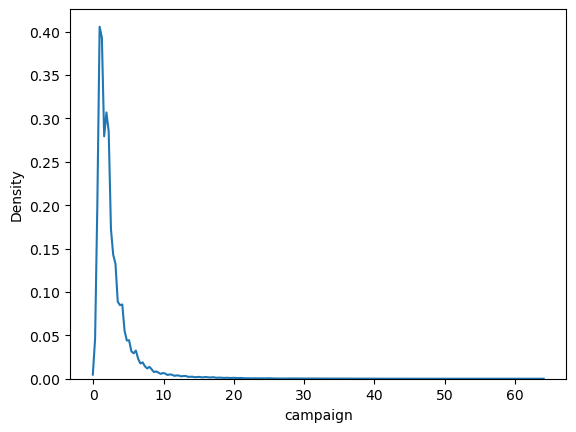

In [25]:
sns.kdeplot(data1["campaign"])
#plot the probalility of occurance of each element
#kde-->  is used to plot discrete Numerical variable

In [26]:
print("Maximum balance:" ,data1['campaign'].max())
print("Minimum balance:d" ,data1['campaign'].min())

print("campaign percentage: ", len(data1[data1['campaign']>up])/len(data1["campaign"])*100)

Maximum balance: 63
Minimum balance:d 1
campaign percentage:  0.0


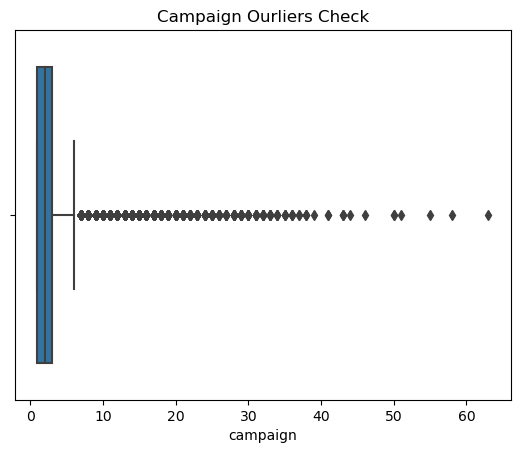

In [27]:
sns.boxplot(x=data1["campaign"])
plt.title("Campaign Ourliers Check")
plt.show()

In [28]:
Qntl1 = data1['campaign'].quantile(0.25)  
Qntl3 = data1['campaign'].quantile(0.75)  
IQR = Qntl3 - Qntl1
lw = Qntl3 - 1.5* IQR
up = Qntl3 + 1.5* IQR
## customers campaign more than upper bound are replaced with upper bound campaign
data1['campaign'] = np.where(data1['campaign']> up, up, data1['campaign'])


Outliers Imputation

0.0 6.0


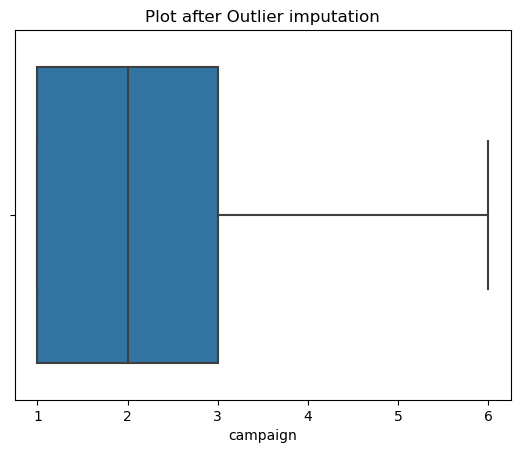

In [29]:
# After outliers imputation 
print(lw, up)
sns.boxplot(x=data1['campaign'])
plt.title('Plot after Outlier imputation')
plt.show()

By the analyzing box plot, we can find that in this campaign contact a particular customer for maximum 6 time and minimum 0 time.

#Outliers for Pdays

Pdays--> 
Number of days that passed by after the client was last contacted from a previous campaign

<AxesSubplot:xlabel='pdays', ylabel='Density'>

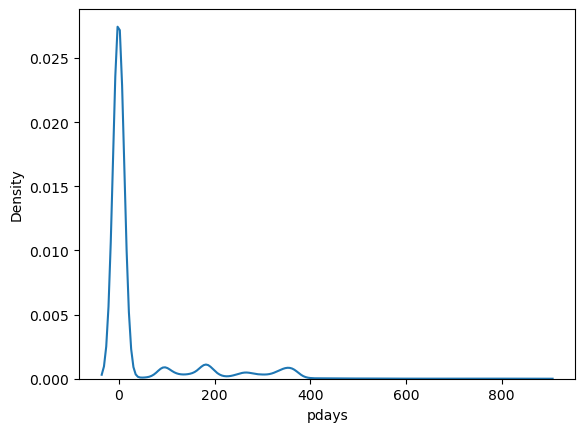

In [30]:
sns.kdeplot(data1['pdays'])

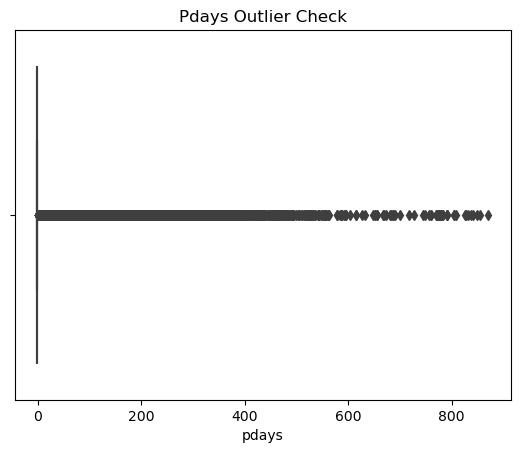

In [31]:
sns.boxplot(x=data1["pdays"])
plt.title("Pdays Outlier Check")
plt.show()

In [32]:
print("Maximum pdays:" ,data1['pdays'].max())
print("Minimum pdays:" ,data1['pdays'].min())
#customer not contacted in perivious campaign= -1
print("customer not contacted in perivious campaign:", len(data1[data1['pdays']== -1])/ len(data1)*100)

Maximum pdays: 871
Minimum pdays: -1
customer not contacted in perivious campaign: 81.73674548229414


By analyzing the pdays data, we find that a large number of customers 81.7% not contacted previously by bank.

We consider, number of days that passed by after the client was last contacted from a previous campaign has no outliers because pdays range does not affect our current campaign.

#outliers for previous

Previous-->
Number of contacts performed before this campaign and for this client

**how many time we have contacted this person before this campaign(current)

<AxesSubplot:xlabel='previous', ylabel='Density'>

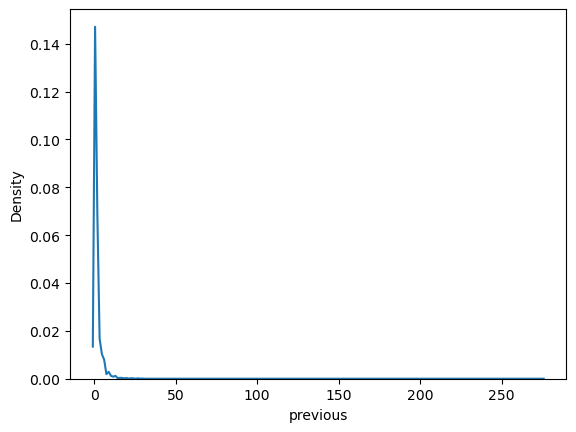

In [33]:
sns.kdeplot(data1["previous"])

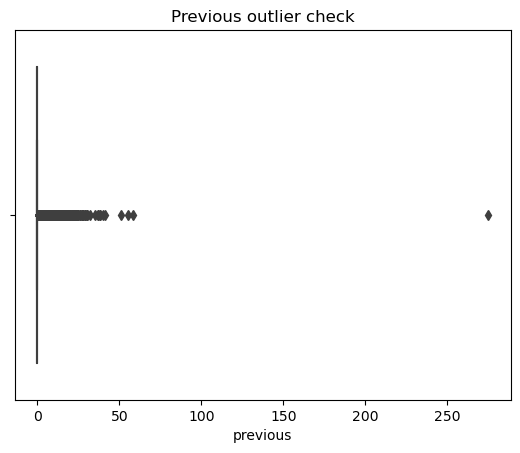

In [34]:
sns.boxplot(x=data1["previous"])
plt.title("Previous outlier check")
plt.show()

No use of box plot here

81.73 % of customers has not contacted before the current campaign

In [35]:
print("Max:",data1["previous"].max())
print("Min:",data1["previous"].min())
print("previously not contacted customer:",len(data1[data1["previous"]==0])/len(data1)*100)

Max: 275
Min: 0
previously not contacted customer: 81.73674548229414


In [36]:
#calculate mean
#81.73 % customers not contacted previosly hence mean value is nor correct
print(data1["previous"].mean())

0.5803233726305546


In [37]:
print(data1["previous"].median())

0.0


Median value also not showing correct o/p

In [38]:
x=data1["previous"].unique()
x.sort()
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  32,  35,  37,  38,  40,  41,  51,  55,
        58, 275], dtype=int64)

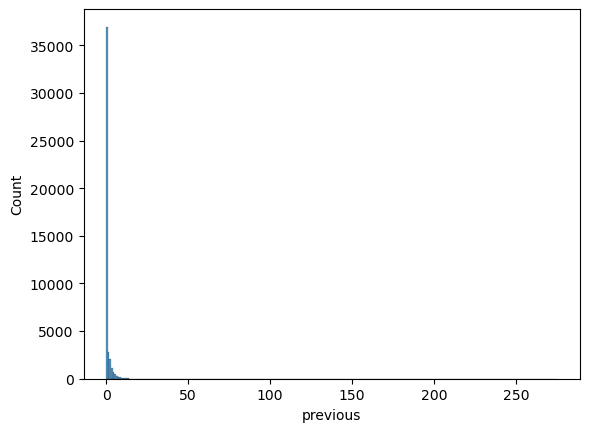

In [39]:
sns.histplot(x=data1["previous"],bins=[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  32,  35,  37,  38,  40,  41,  51,  55,
        58, 275])
plt.show()

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


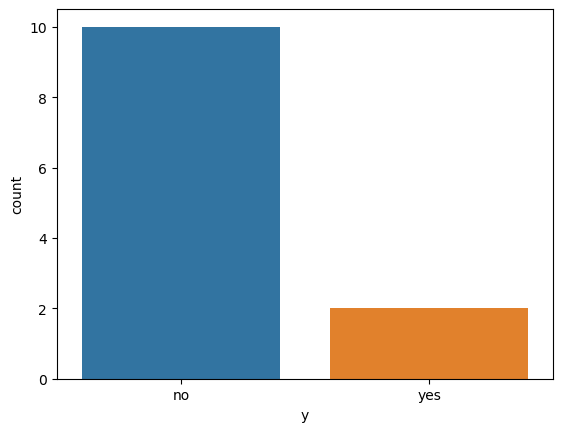

In [40]:
temp=data1[data1["previous"]>30]
sns.countplot(temp["y"])
plt.show()

In [41]:
## customers previous contact more than 30  are replaced with  30
data1['previous'] = np.where(data1['previous']>30, 30, data1['previous'])

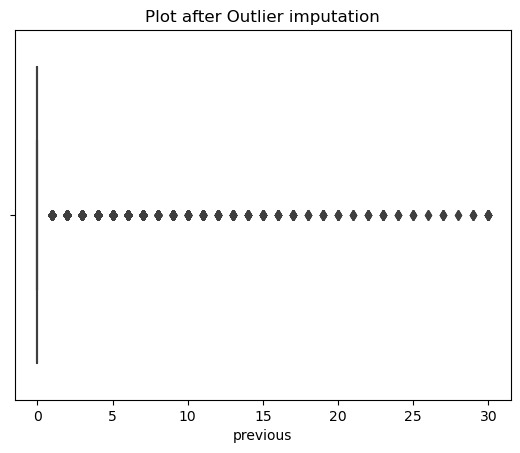

In [42]:
# After outliers imputation 
sns.boxplot(x=data1['previous'])
plt.title('Plot after Outlier imputation')
plt.show()

By analyzing the previous data, we find that number of contacts performed before this campaign for particular customer should not be exceed 30.

Almost 81% customers were not previously contacted for loan.

#Descriptive Statistics

In [43]:
data2 = data1.copy()
data2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.868185,1362.272058,15.806419,258.163080,2.392228,40.197828,0.571985
std,10.394895,3044.765829,8.322476,257.527812,1.600111,100.128746,1.853639
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,70.500000,102127.000000,31.000000,4918.000000,6.000000,871.000000,30.000000


#Below conclusion can be done based on data summary:
Maximum age is 70.5 and minimum age is 18.

Minimum account balance of customer is in negative; it means some accounts are loan account and maximum balance is 102127.

Maximum number of contacts performed during this campaign for particular customer is 6 and minimum contact is 1.

Maximum number of days that passed by after the client was last contacted from a previous campaign is 871 and minimum days is -1, it means some customers are not contacted previously.

Around 81.7% of  customers were not contacted in previous campaign and maximum time contact a customer should be 6.

#Univariate Analysis
Univariate analysis is the one in which we analyze data of just one variable. A variable in our dataset refers to a single feature/column.

##Analysis of deposit record of customers(subscribed or not)

In [44]:
data2[data2["y"]=="yes"].shape #its gives tuple of rows,column
#0--> rows
#1--> column

(5289, 17)

In [45]:
#count of deposit of customers
deposit_counts=data2["y"].value_counts() #find count of each unique 
#value present in column
print(deposit_counts)
print("yes deposit percentage",np.round((data2[data2["y"]=="yes"].shape[0]/data2.shape[0])*100,2),"%")

no     39922
yes     5289
Name: y, dtype: int64
yes deposit percentage 11.7 %


C:\Users\utkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


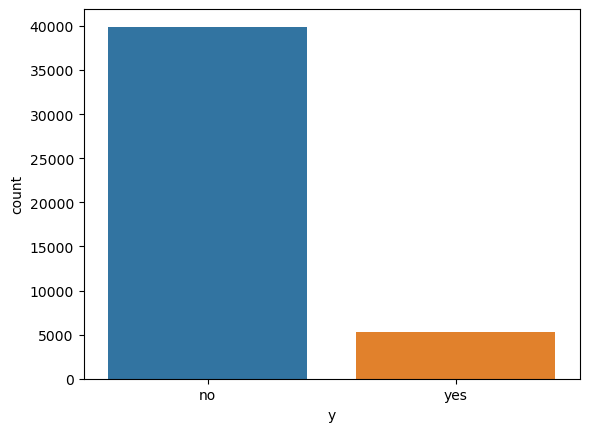

In [46]:
# plot of customer deposit 
sns.countplot(data2.y)
plt.show()

Customers deposit for "yes" is around 11.7%.

#Analysis last contact month of year

In [47]:
data3=data2.sort_values(["month"])
month_counts=data3["month"].value_counts()
print(month_counts)
print("max no of contacts within a month",max(month_counts))
print("min no of contacts within a month",min(month_counts))
print("Total number of contacts",sum(month_counts))

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
max no of contacts within a month 13766
min no of contacts within a month 214
Total number of contacts 45211


Customers contacted in each month
Maximum number of customers were conatced in MAY
Minimun in December  

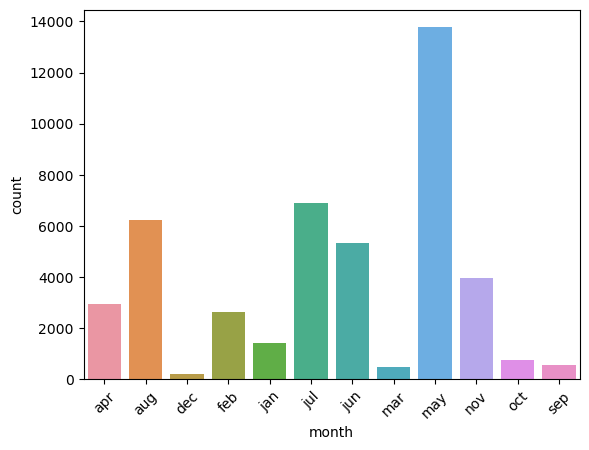

In [48]:
# plot
sns.countplot(x='month', data= data3)
plt.xticks(rotation=45) #rotation of labels at x axis
plt.show()

By analyzing above figure, we can see that maximum customers were contacted in month of "may" 
And minimum contacted in month of "dec". 
It means our previous campaign was most active during summer time

#Communication Types

In [49]:
contact_counts=data2["contact"].value_counts()
print(contact_counts)

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


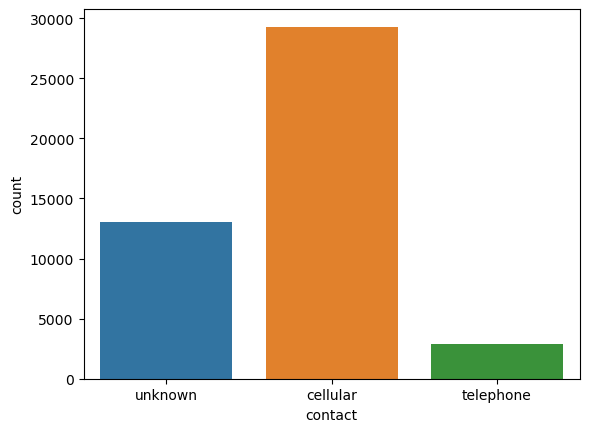

In [50]:
#plot
sns.countplot(x="contact",data=data2)
plt.show()

maximum customers prefered communitation via cellular and minimum communication via telephone 

#Analysis of marital status of customers

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


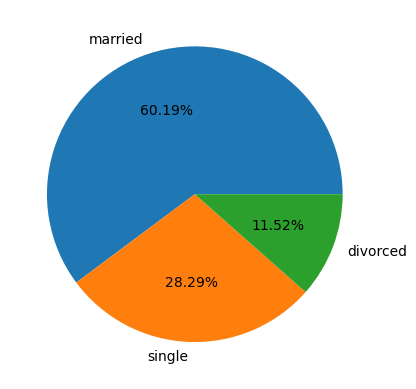

In [51]:
#count of marital status of customers
marital_counts=data2["marital"].value_counts()
print(marital_counts)

#plot
plt.pie(data2["marital"].value_counts(),
        labels=data2["marital"].unique(),autopct="%.2f%%")
plt.show()


By analyzing the figure above, we can see that customer marital status has three categories (Single, Divorced, Married).

Married customers are maximum (60.19%) and minimum customers are divorced (11.52%).

#Housing Loan

In [52]:
housing_loan_counts=data2["housing"].value_counts()
print(housing_loan_counts)

print("percentage of customers who have house loan:",
      np.round((data2[data2["housing"]=="yes"].shape[0]/data2.shape[0])*100,2),"%")

yes    25130
no     20081
Name: housing, dtype: int64
percentage of customers who have house loan: 55.58 %


<AxesSubplot:xlabel='housing', ylabel='count'>

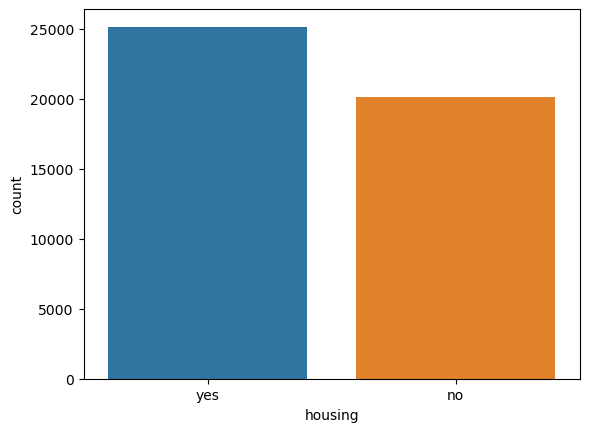

In [53]:
sns.countplot(x=data2["housing"])

Around 55.58% of the total customers already have housing loan

#Personal Loan

In [54]:
personal_loan=data2["loan"].value_counts()
print(personal_loan)

print("percentage of customers who have personal loan",
      np.round(data2[data2["loan"]=="yes"].shape[0]/data2.shape[0]*100,2)
      )

no     37967
yes     7244
Name: loan, dtype: int64
percentage of customers who have personal loan 16.02


C:\Users\utkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


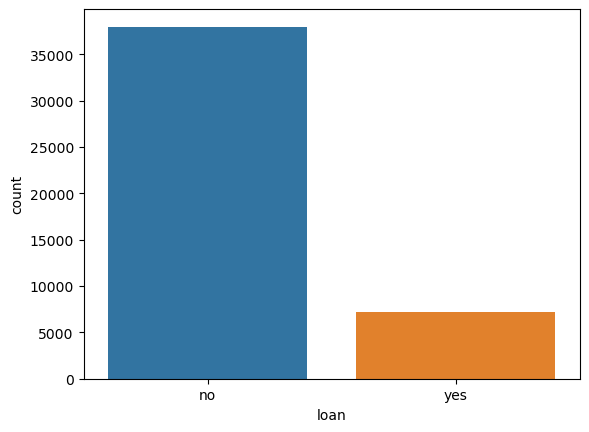

In [55]:
sns.countplot(data2["loan"])
plt.show()

around 16.02% of total customers have personal loan .

In [56]:
#customers who have opt both personal and home loan
print(data2[(data2['housing']=="yes") & (data2['loan']=="yes")])
data_temp=data2[(data2['housing']=="yes") & (data2['loan']=="yes")]


        age           job  marital  education default  balance housing loan  \
2      33.0  entrepreneur  married  secondary      no        2     yes  yes   
6      28.0    management   single   tertiary      no      447     yes  yes   
20     28.0   blue-collar  married  secondary      no      723     yes  yes   
22     32.0   blue-collar   single    primary      no       23     yes  yes   
24     40.0       retired  married    primary      no        0     yes  yes   
...     ...           ...      ...        ...     ...      ...     ...  ...   
45103  33.0        admin.  married  secondary      no       51     yes  yes   
45108  36.0    technician  married   tertiary      no      844     yes  yes   
45122  40.0  entrepreneur   single   tertiary      no      262     yes  yes   
45151  47.0    management   single   tertiary      no      311     yes  yes   
45194  59.0    management  married   tertiary      no      138     yes  yes   

        contact  day month  duration  campaign  pda

In [57]:
#percentage of customers who opt both personal loan and home loan
print(np.round(data2[(data2['housing']=="yes") & (data2['loan']=="yes")].
               shape[0]/data2.shape[0]*100,2),"%")

9.66 %


#Around 9.66% of customers opt both home loan as well as personal loan


Yes 4367
Else 40844


<BarContainer object of 2 artists>

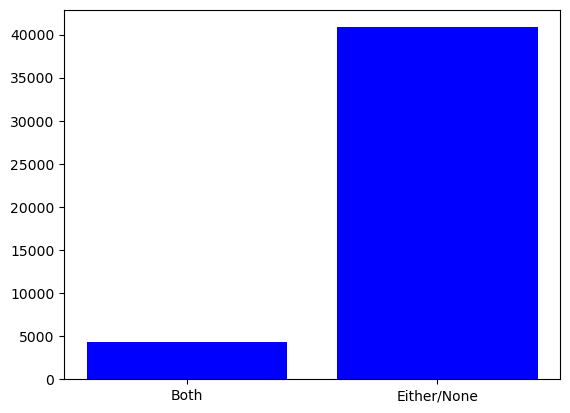

In [58]:
#plot the graph of customers who have opt both home and personal load
x=data2[(data2['housing']=="yes") & (data2['loan']=="yes")].shape[0]
y=(data2[(data2['housing']=="yes") & (data2['loan']=="no")].shape[0])+ (data2[(data2['housing']=="no") & (data2['loan']=="yes")].shape[0]) + (data2[(data2['housing']=="no") & (data2['loan']=="no")].shape[0])
print("Yes",x)
print("Else",y)

d={'Both':x, 'Either/None':y}
courses = list(d.keys())
values = list(d.values())
plt.bar(courses, values, color ='blue')


#Analysis of type of jobs of customers




blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


<AxesSubplot:title={'center':'job types of customers'}>

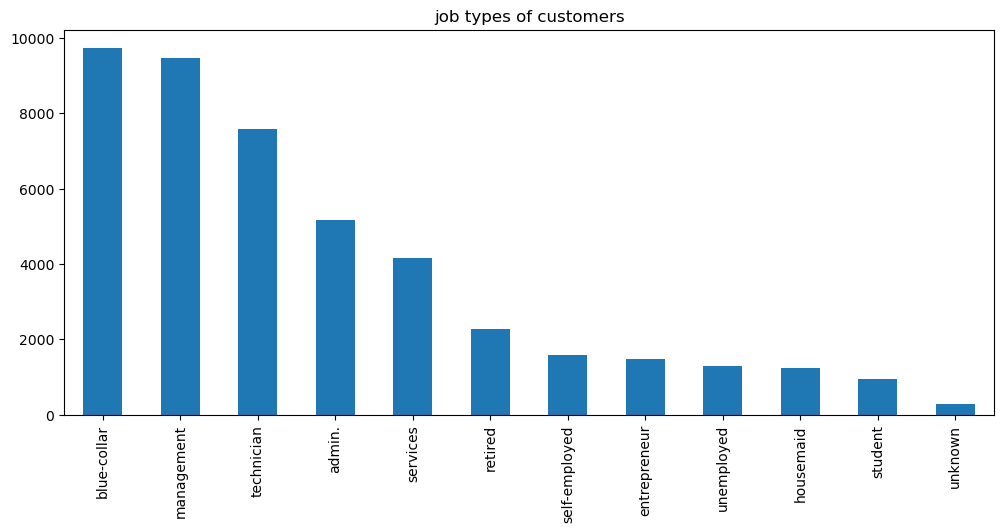

In [59]:
#count of job types of customers
job_counts=data2["job"].value_counts()
print(job_counts)
 
 #bar plot
#plt.subplot(221) --> can be used to resize the plot
data2["job"].value_counts().plot(kind="bar",title="job types of customers",figsize=(12,5))
#figsize--> resize the graph




Maximum customers have blue-collar(physical worker) jobs and some part of jobs types is unknown

#Analysis of Poutcome

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


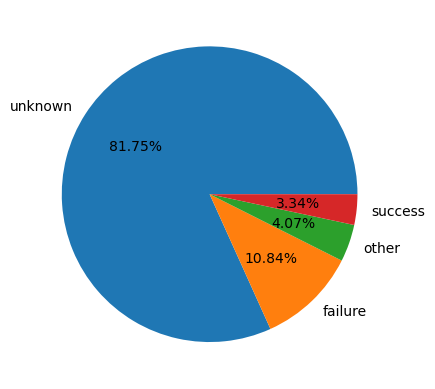

In [60]:
#poutcome-->outcome of the previous marketing campaign
#count of previously targeted customers
poutcome_count=data2["poutcome"].value_counts()
print(poutcome_count)


plt.pie(data2["poutcome"].value_counts(),
        labels=data2["poutcome"].unique(),autopct="%1.2f%%")
plt.show()

By analyzing above graph, we find that outcome of the previous marketing campaign was not pretty good. As we can see that success rate is 3.34% which is very low

Almost 81.75% outcome is unknown and 10.84% campaign outcome is failure and 4.07% outcome goes for another category.

#Analysis of Default credit

no     44396
yes      815
Name: default, dtype: int64


<AxesSubplot:xlabel='default', ylabel='count'>

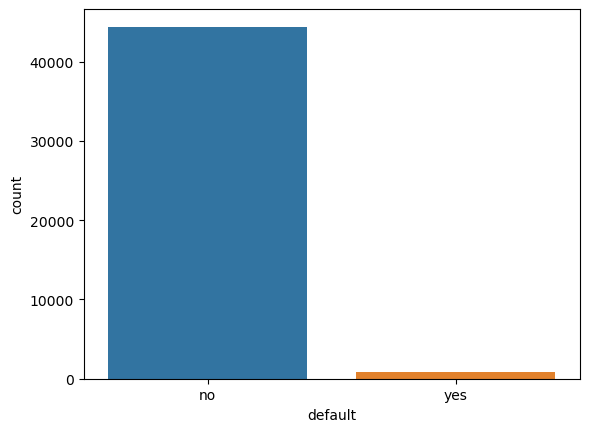

In [61]:
# count of default credit of customer
default_count=data2["default"].value_counts()
print(default_count)
sns.countplot(x=data2["default"])

The count of default loan is very less.


#Analysis of customers education

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


C:\Users\utkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


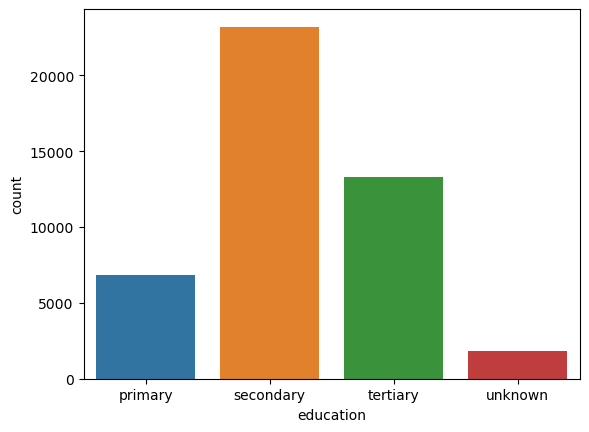

In [62]:
# count of education type of customers
education_counts=data2['education'].value_counts()
print(education_counts)
#Plot of customer education type
sns.countplot(data2['education'].sort_values())
plt.show()

Maximum customers belong to secondary education category and some count of education type is unknown.

Count= Secondary > Tertiary > Primary > Unknown

# Distribution plots of numeric columns

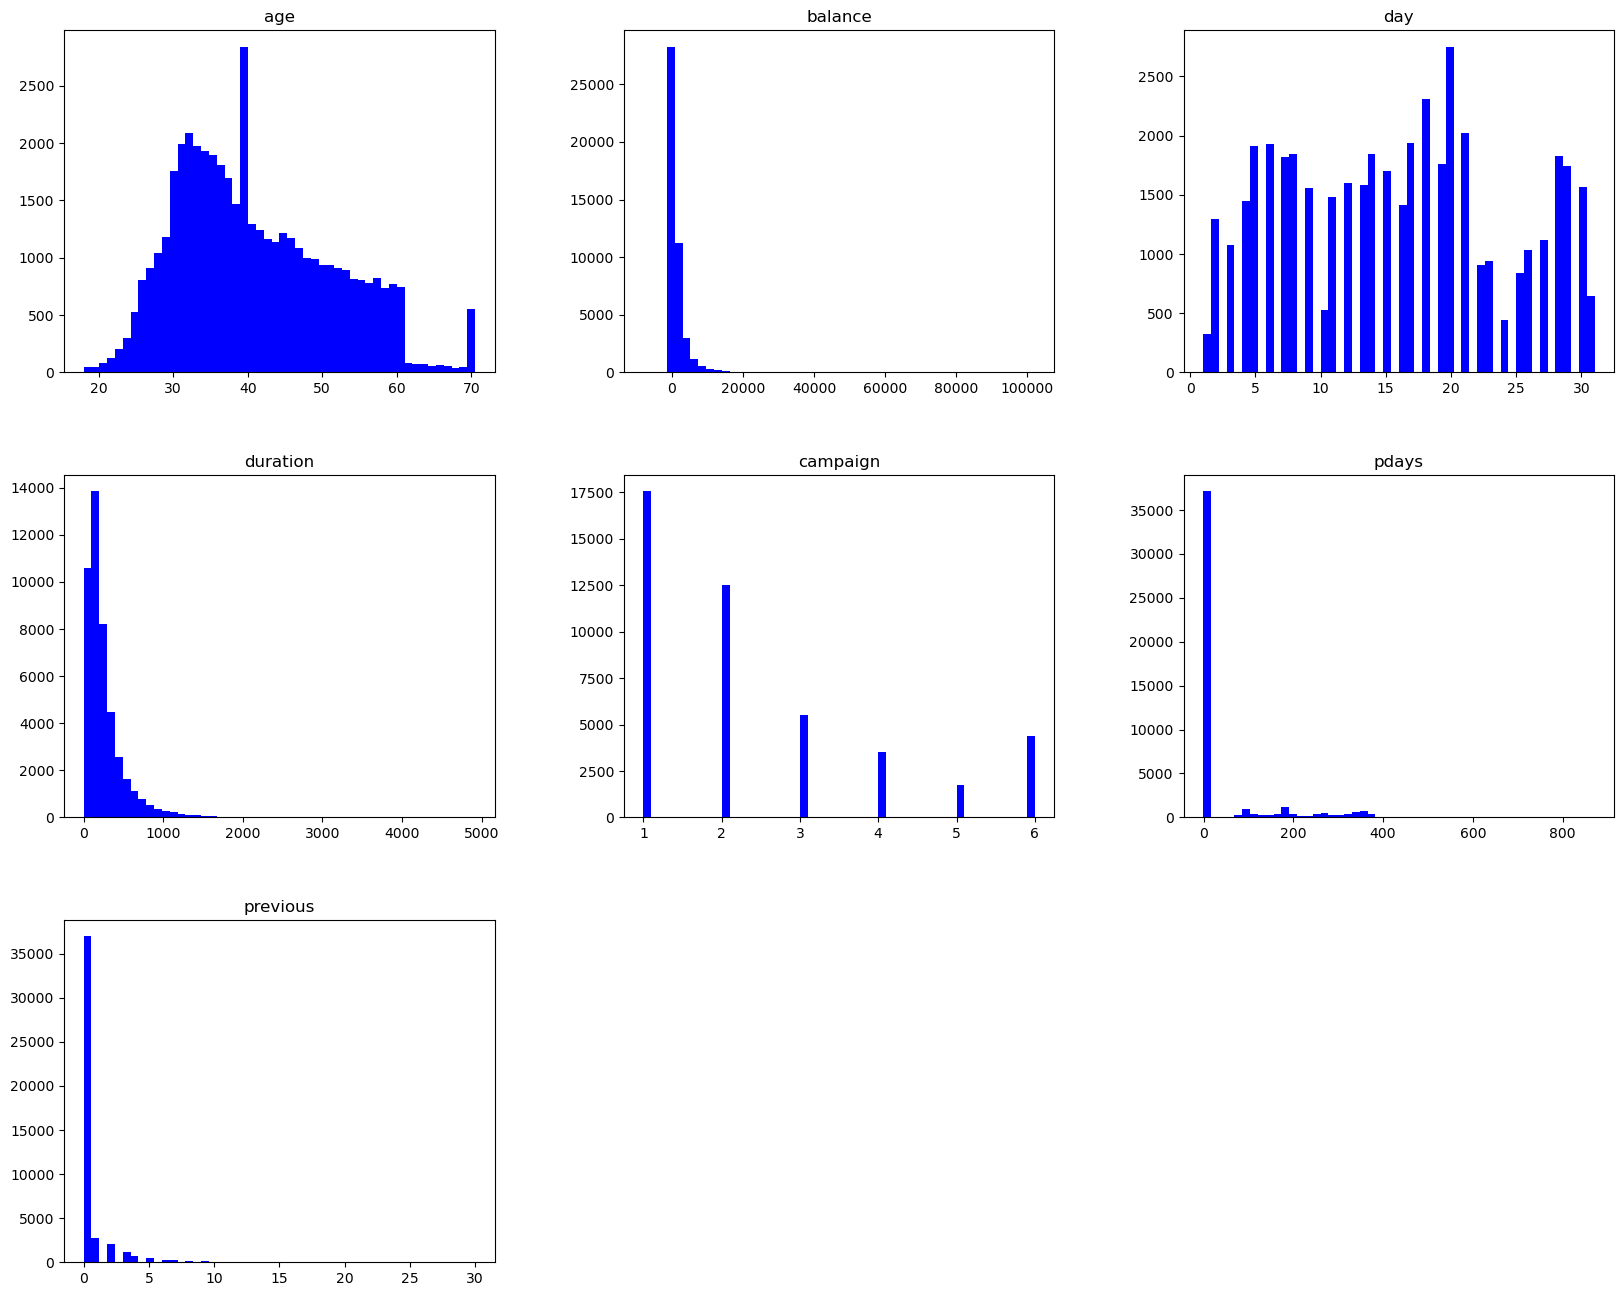

In [63]:
%matplotlib inline
data2.hist(bins = 50, figsize=(20,16), color = 'blue',grid=False) 
plt.show()

# Bi-Variate Analysis
Bivariate analysis is stated to be an analysis of any concurrent relation between two variables or attributes. 

This study explores the relationship of two variables as well as the depth of this relationship to figure out if there are any discrepancies between two variables and any causes of this difference.

#Comparision of job, education, marital and contact data with target variable "deposit"

Text(0, 0.5, 'Frequency')

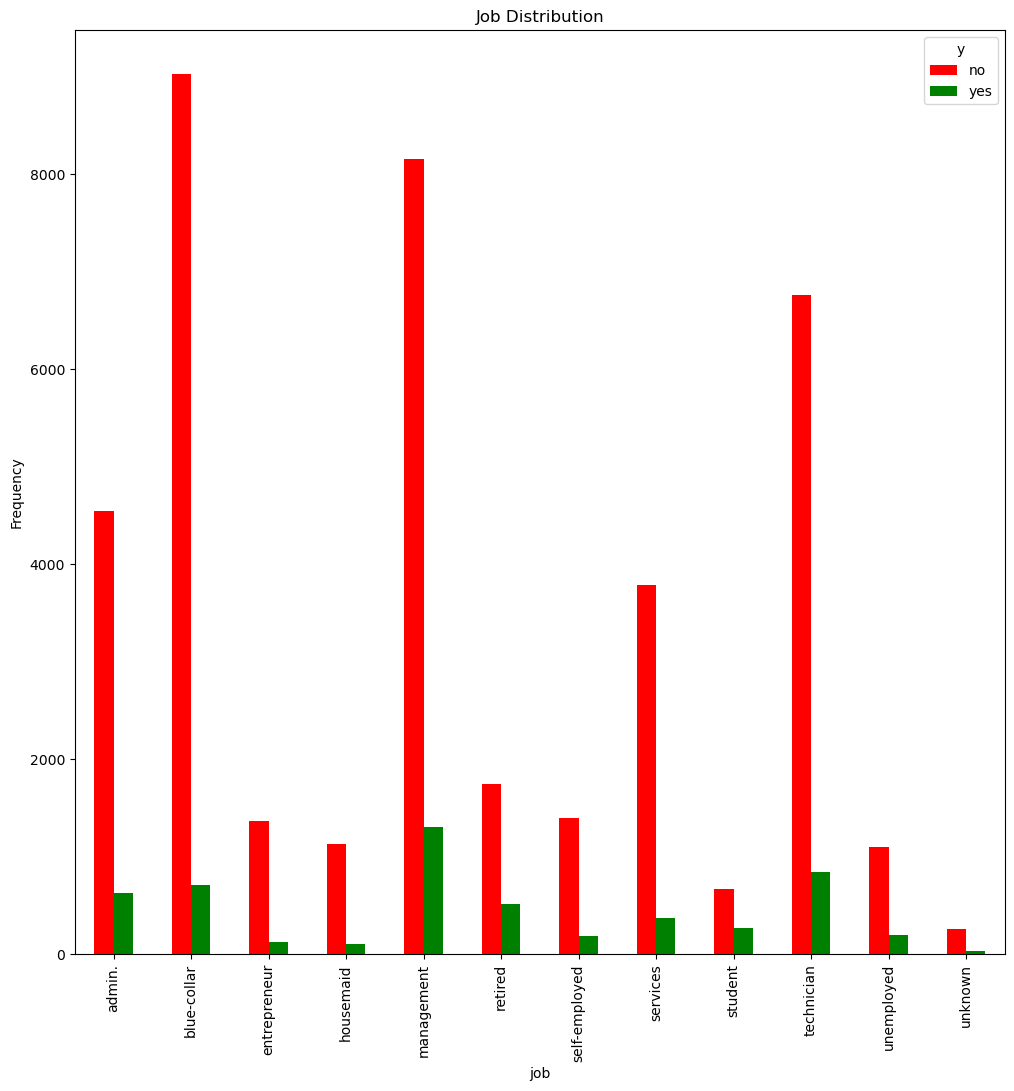

In [64]:
# job vs deposit
pd.crosstab(data2['job'],data2['y']).plot(kind='bar',figsize=(12,12),
                                          color=['red','green'])
#crosstab is used to plot histogram of two or more factors of deposit(output variable)
# Here two output variables are there yes and no 
plt.title("Job Distribution")
plt.ylabel("Frequency")


In [65]:
for x in data2['job'].unique():
  a1=data2[(data2['job']==x)]['y'].value_counts()
  z={x:np.round((a1['yes']/(a1['yes']+a1['no']))*100,2)}
  print(dict(sorted(z.items(), key=lambda item: item[1])))


{'management': 13.76}
{'technician': 11.06}
{'entrepreneur': 8.27}
{'blue-collar': 7.27}
{'unknown': 11.81}
{'retired': 22.79}
{'admin.': 12.2}
{'services': 8.88}
{'self-employed': 11.84}
{'unemployed': 15.5}
{'housemaid': 8.79}
{'student': 28.68}


Text(0, 0.5, 'Frequency')

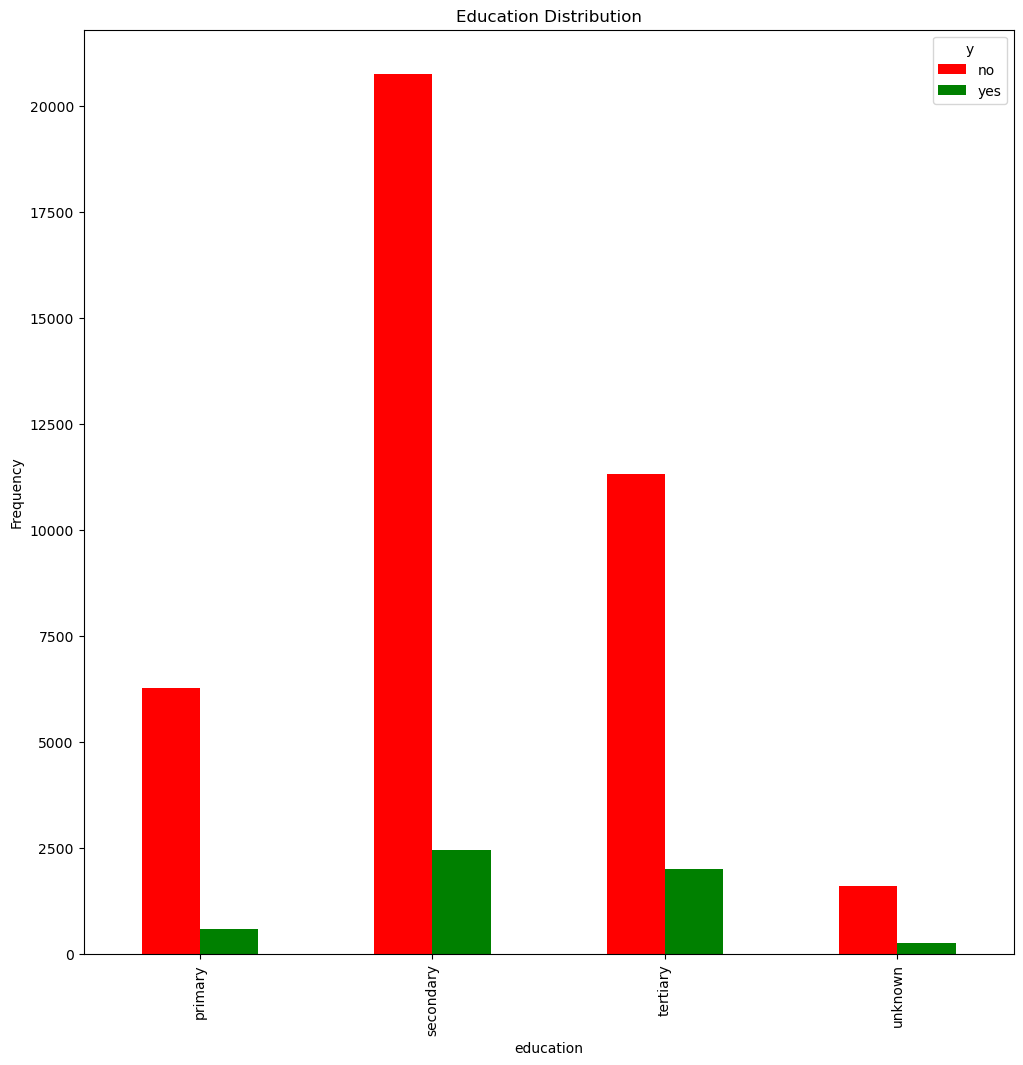

In [66]:
# Education vs Deposit
pd.crosstab(data2['education'],data2['y']).plot(kind="bar",
                                                figsize=(12,12),color=['red','green'])
plt.title("Education Distribution")
plt.ylabel("Frequency")


In [67]:
for x in data2['education'].unique():
  a1=data2[(data2['education']==x)]['y'].value_counts()
  z={x:np.round((a1['yes']/(a1['yes']+a1['no']))*100,2)}
  print(dict(sorted(z.items(), key=lambda item: item[1])))


{'tertiary': 15.01}
{'secondary': 10.56}
{'unknown': 13.57}
{'primary': 8.63}


Text(0, 0.5, 'Frequency')

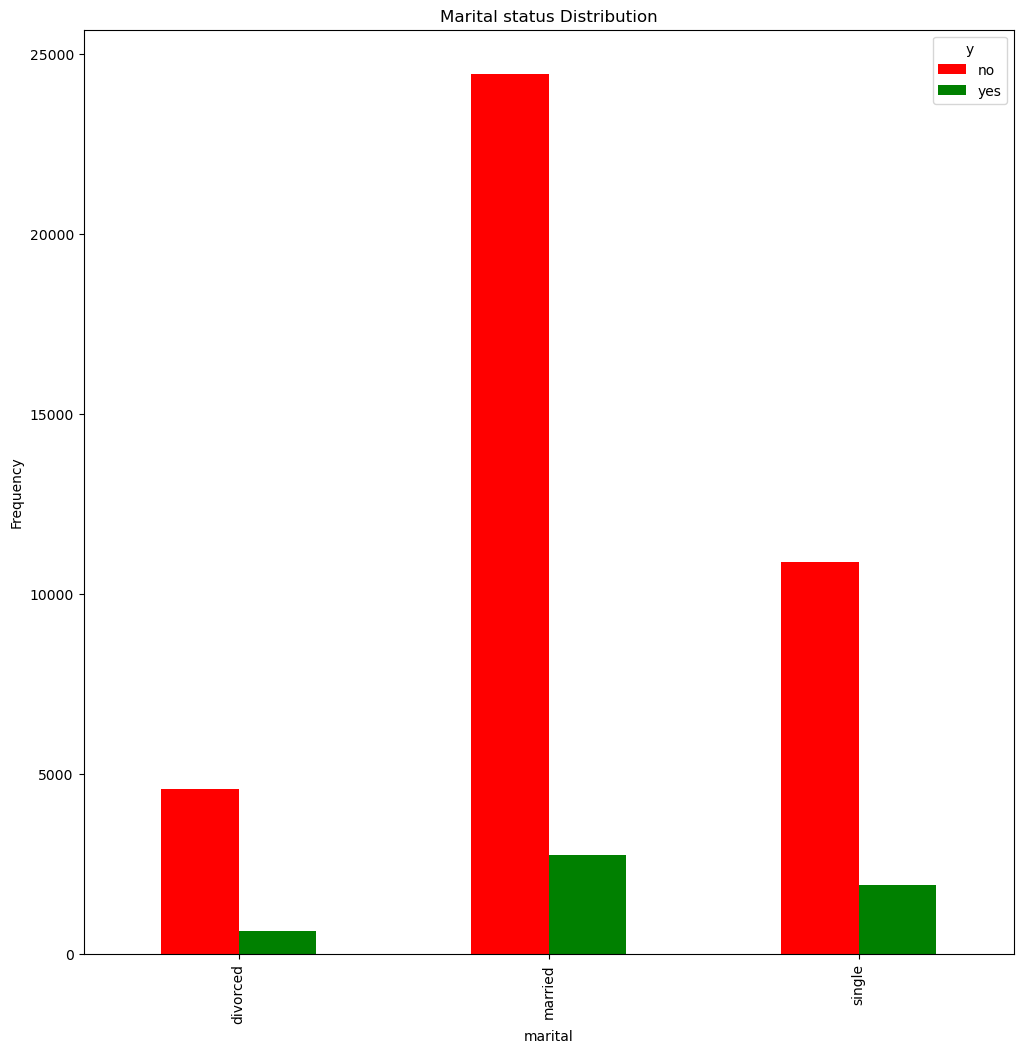

In [68]:
# marital vs deposit
pd.crosstab(data2['marital'],data2['y']).plot(kind="bar",figsize=(12,12),
                                              color=['red','green'])
plt.title('Marital status Distribution')
plt.ylabel('Frequency')

In [69]:
for x in data2['marital'].unique():
  a1=data2[(data2['marital']==x)]['y'].value_counts()
  z={x:np.round((a1['yes']/(a1['yes']+a1['no']))*100,2)}
  print(dict(sorted(z.items(), key=lambda item: item[1])))


{'married': 10.12}
{'single': 14.95}
{'divorced': 11.95}


Text(0, 0.5, 'Frequency')

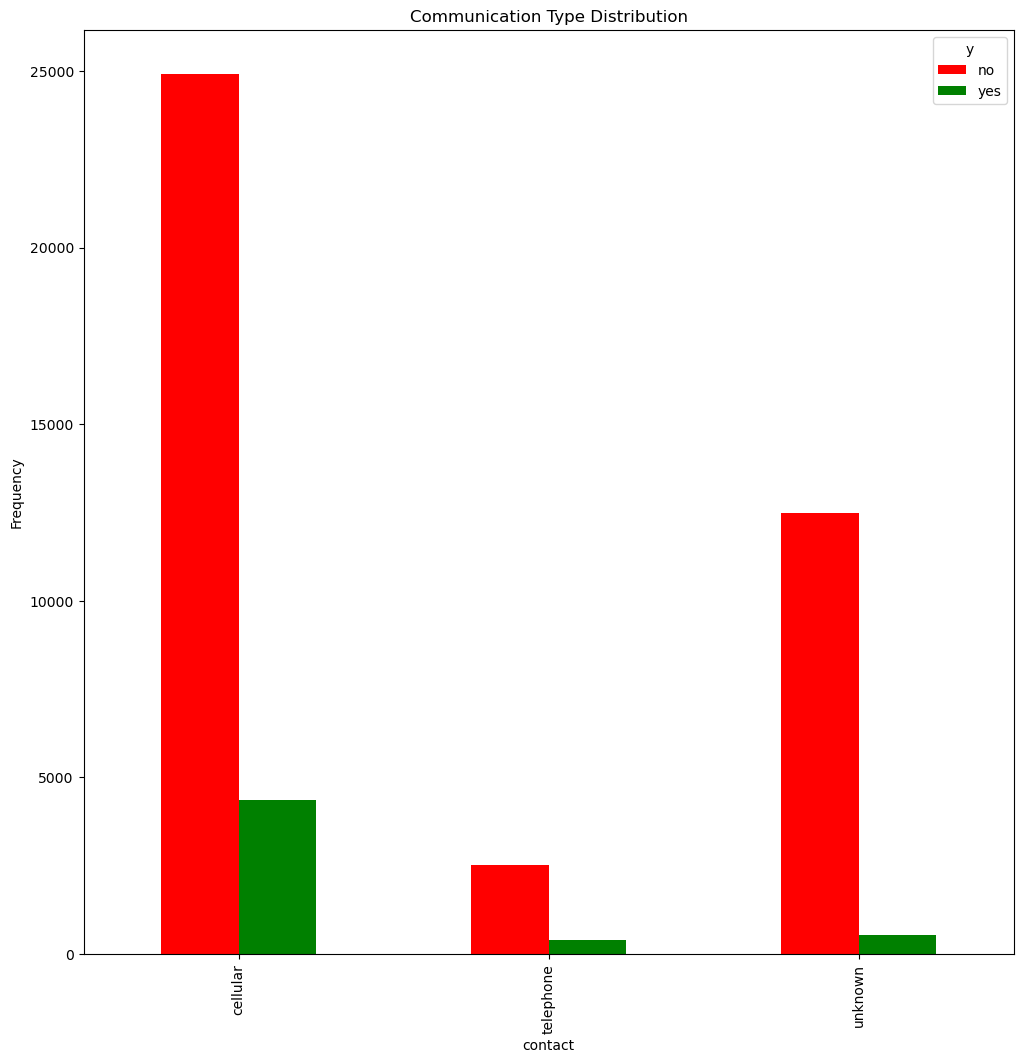

In [70]:
# contact vs deposit
pd.crosstab(data2['contact'],data2['y']).plot(kind="bar",
                                              figsize=(12,12),color=['red','green'])
plt.title("Communication Type Distribution")
plt.ylabel("Frequency")


In [71]:
for x in data2['contact'].unique():
  a1=data2[(data2['contact']==x)]['y'].value_counts()
  z={x:np.round((a1['yes']/(a1['yes']+a1['no']))*100,2)}
  print(dict(sorted(z.items(), key=lambda item: item[1])))


{'unknown': 4.07}
{'cellular': 14.92}
{'telephone': 13.42}


From the above output we can analyse that the percentage of conversion is almost same in the case of Cellular and Telephone

# Comparision of housing loan, loan and default data with target variable "deposit"

Text(0, 0.5, 'Frequency')

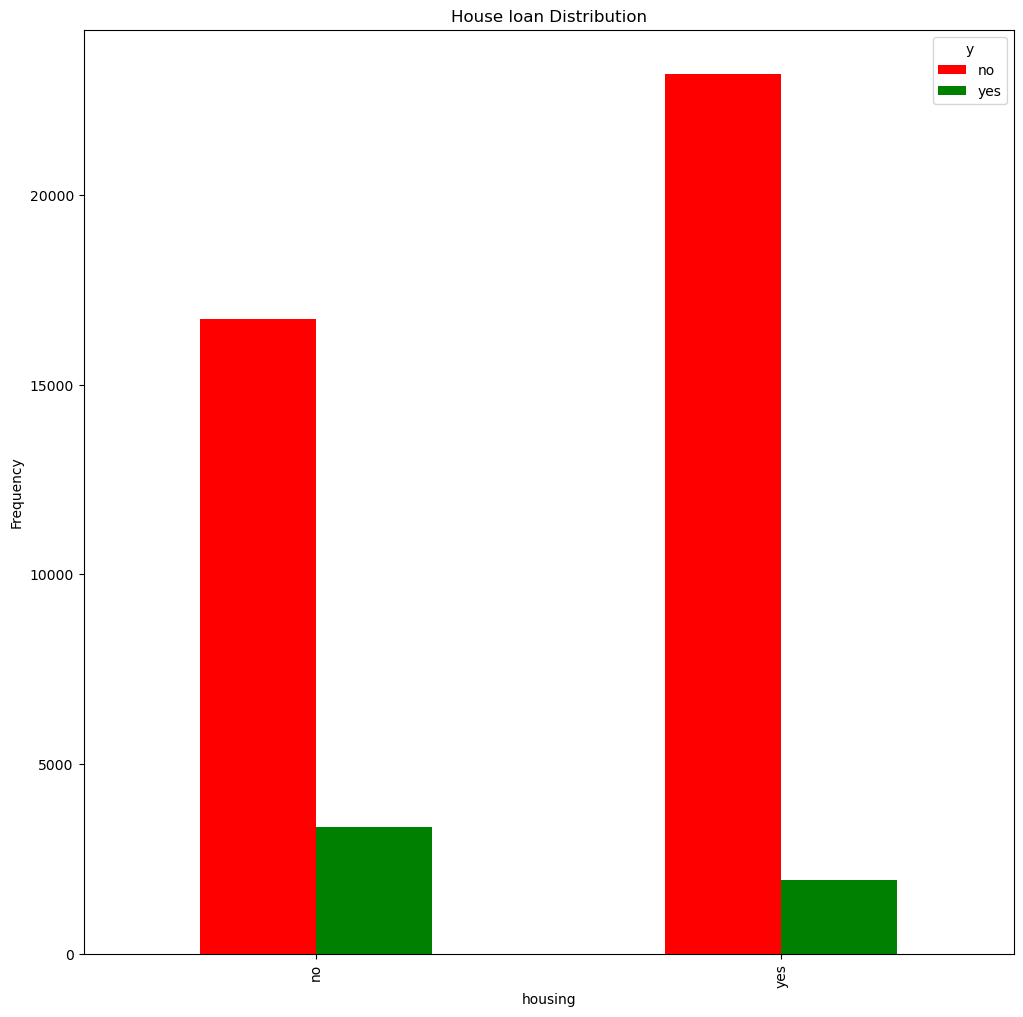

In [72]:
# housing vs deposit
pd.crosstab(data2['housing'],data2['y']).plot(kind="bar",figsize=(12,12),color=['red','green'])
plt.title('House loan Distribution')
plt.ylabel('Frequency')

In [73]:
for x in data2['housing'].unique():
  a1=data2[(data2['housing']==x)]['y'].value_counts()
  z={x:np.round((a1['yes']/(a1['yes']+a1['no']))*100,2)}
  print(dict(sorted(z.items(), key=lambda item: item[1])))

{'yes': 7.7}
{'no': 16.7}


Those who doesn't have any housing loan have a better conversion rate for deposit

Text(0, 0.5, 'Frequency')

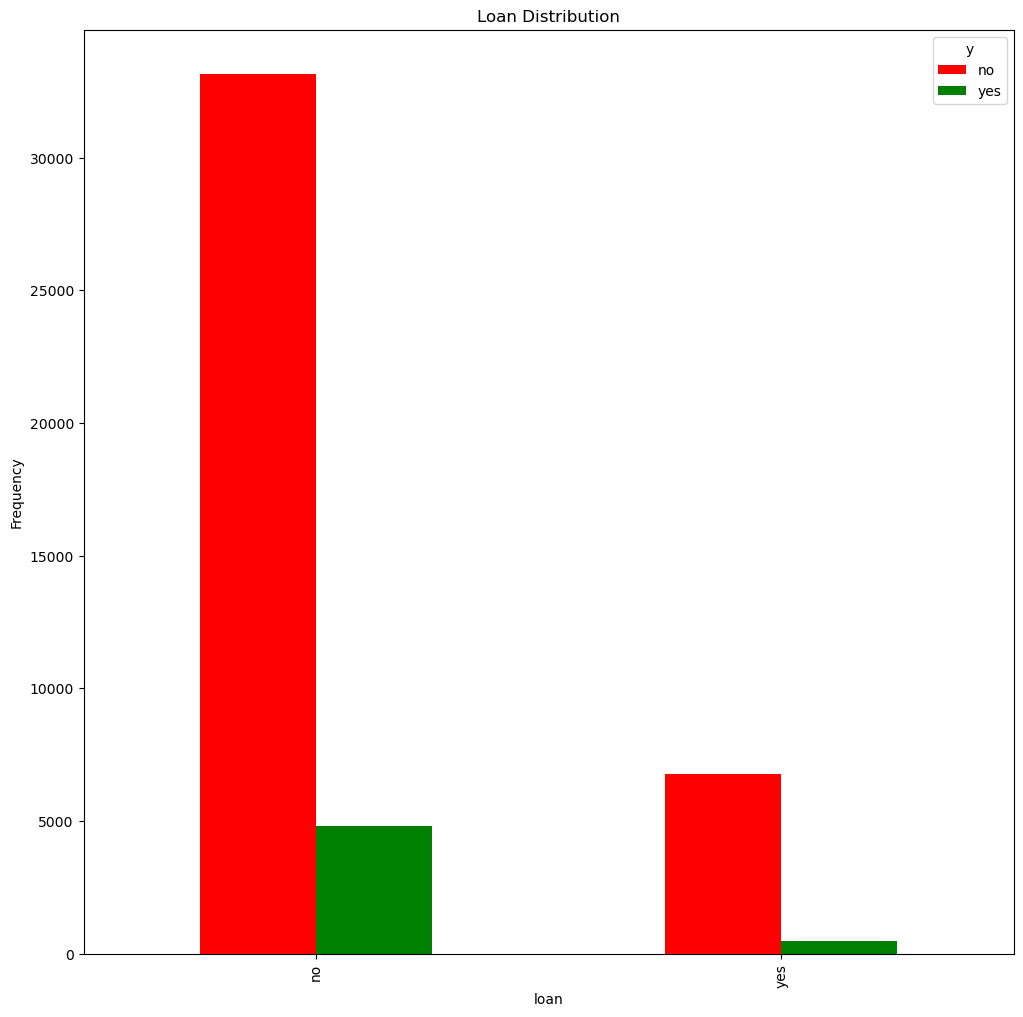

In [74]:
# loan vs deposit
pd.crosstab(data2['loan'],data2['y']).plot(kind="bar",figsize=(12,12),color=['red','green'])
plt.title('Loan Distribution')
plt.ylabel('Frequency')

In [75]:
for x in data2['loan'].unique():
  a1=data2[(data2['loan']==x)]['y'].value_counts()
  z={x:np.round((a1['yes']/(a1['yes']+a1['no']))*100,2)}
  print(dict(sorted(z.items(), key=lambda item: item[1])))

{'no': 12.66}
{'yes': 6.68}


Those who doesn't have any Personal loan have a better conversion rate for deposit

Text(0, 0.5, 'Frequency')

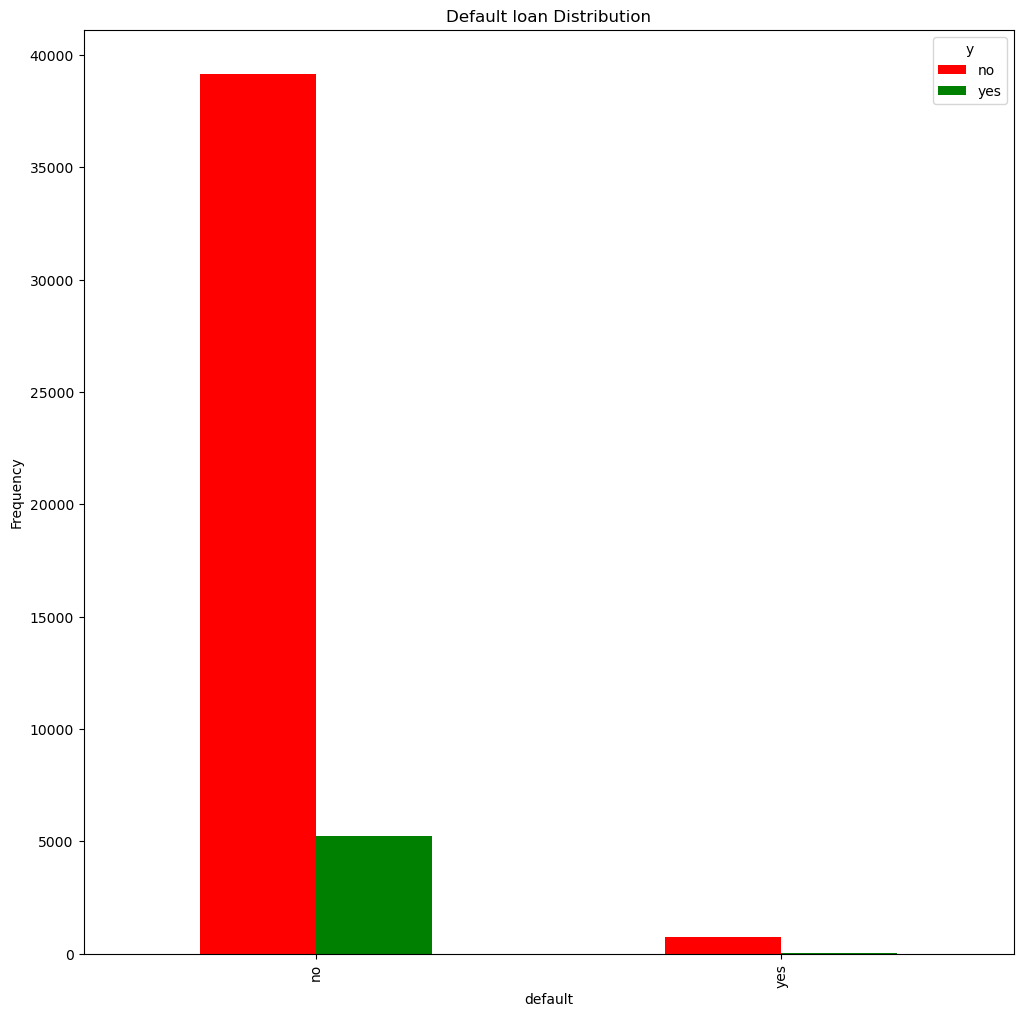

In [76]:
# Loan defaulter vs deposit
pd.crosstab(data2['default'],data2['y']).plot(kind="bar",figsize=(12,12),color=['red','green'])
plt.title('Default loan Distribution')
plt.ylabel('Frequency')

In [77]:
for x in data2['default'].unique():
  a1=data2[(data2['default']==x)]['y'].value_counts()
  z={x:np.round((a1['yes']/(a1['yes']+a1['no']))*100,2)}
  print(dict(sorted(z.items(), key=lambda item: item[1])))

{'no': 11.8}
{'yes': 6.38}


Those who doesn't have any credit default have a better conversion rate for deposit

# Comparision of campaign, poutcome and month data with target variable "deposit"

Text(0, 0.5, 'Frequency')

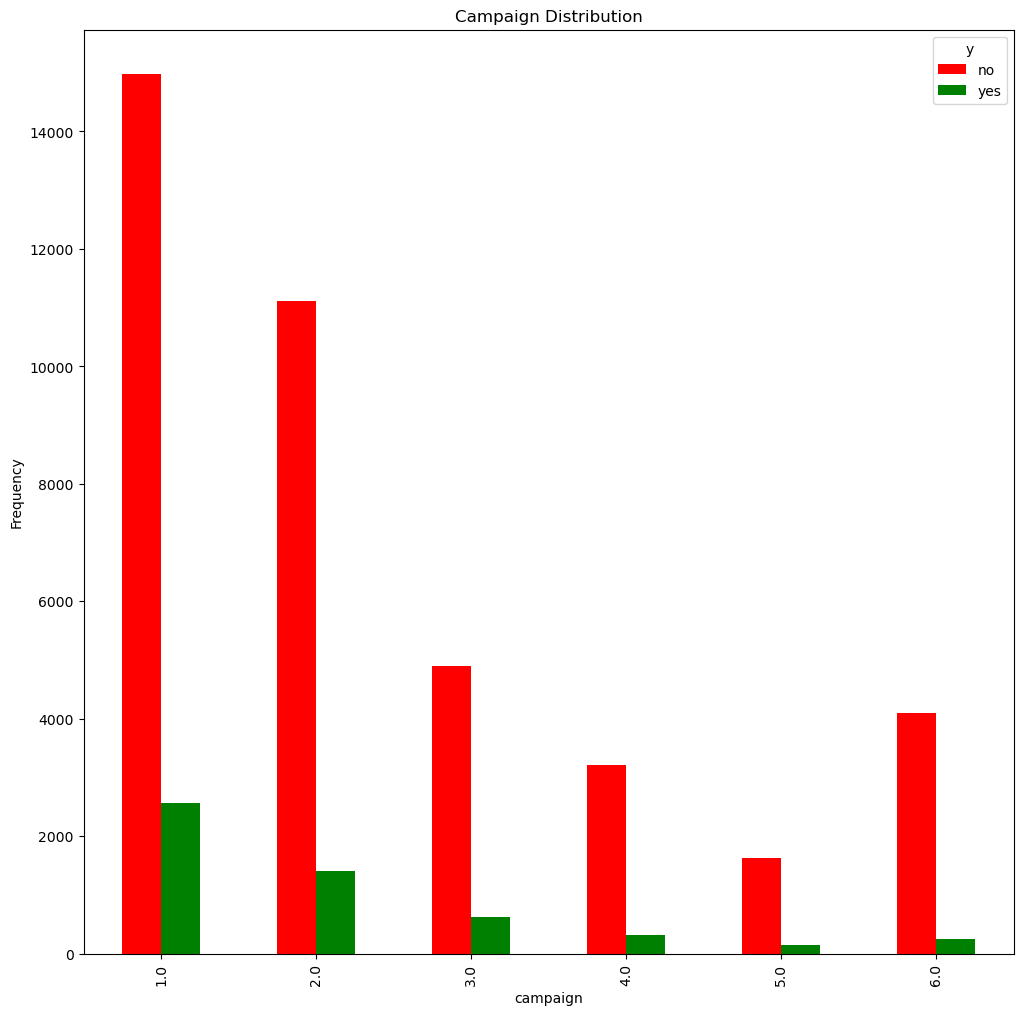

In [78]:
# campaign vs deposit
pd.crosstab(data2['campaign'],data2['y']).plot(kind="bar",
                                               figsize=(12,12),color=['red','green'])
plt.title('Campaign Distribution')
plt.ylabel('Frequency')

In [79]:
for x in data2['campaign'].unique():
  a1=data2[(data2['campaign']==x)]['y'].value_counts()
  z={x:np.round((a1['yes']/(a1['yes']+a1['no']))*100,2)}
  print(dict(sorted(z.items(), key=lambda item: item[1])))

{1.0: 14.6}
{2.0: 11.2}
{3.0: 11.19}
{5.0: 7.88}
{4.0: 9.0}
{6.0: 5.81}


Whenever customer was contacted 1,2 or 3 times, there were maximum chances he/she opted for deposit i.e. subscribe to the term deposit. 

Text(0, 0.5, 'Frequency')

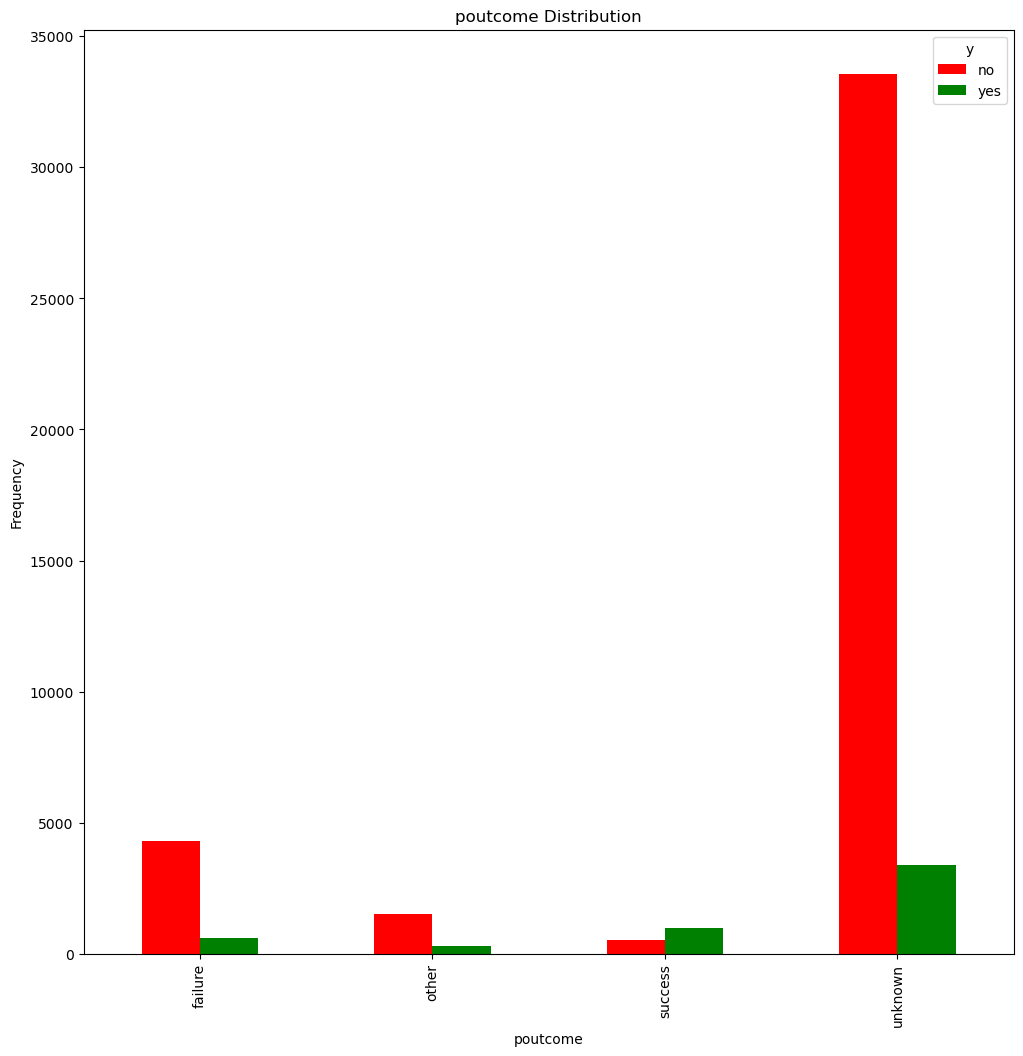

In [80]:
# poutcome vs deposit
pd.crosstab(data2['poutcome'],data2['y']).plot(kind="bar",figsize=(12,12),color=['red','green'])
plt.title('poutcome Distribution')
plt.ylabel('Frequency')

In [81]:
for x in data2['poutcome'].unique():
  a1=data2[(data2['poutcome']==x)]['y'].value_counts()
  z={x:np.round((a1['yes']/(a1['yes']+a1['no']))*100,2)}
  print(dict(sorted(z.items(), key=lambda item: item[1])))

{'unknown': 9.16}
{'failure': 12.61}
{'other': 16.68}
{'success': 64.73}


No analysis can be drawn from the above output.

Text(0, 0.5, 'Frequency')

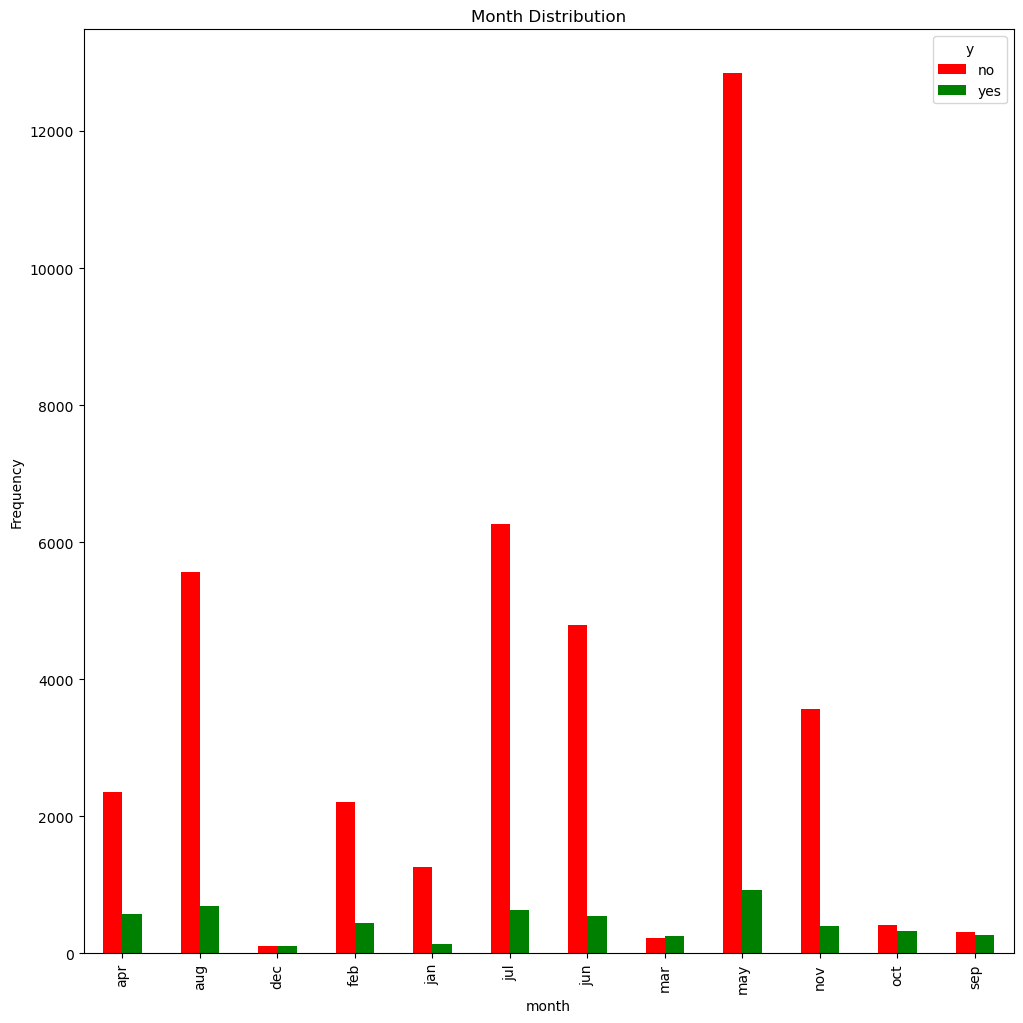

In [82]:
# month vs deposit
pd.crosstab(data2['month'],data2['y']).plot(kind="bar",figsize=(12,12),color=['red','green'])
plt.title('Month Distribution')
plt.ylabel('Frequency')

In [83]:
for x in data2['month'].unique():
  a1=data2[(data2['month']==x)]['y'].value_counts()
  z={x:np.round((a1['yes']/(a1['yes']+a1['no']))*100,2)}
  print(dict(sorted(z.items(), key=lambda item: item[1])))

{'may': 6.72}
{'jun': 10.22}
{'jul': 9.09}
{'aug': 11.01}
{'oct': 43.77}
{'nov': 10.15}
{'dec': 46.73}
{'jan': 10.12}
{'feb': 16.65}
{'mar': 51.99}
{'apr': 19.68}
{'sep': 46.46}


Conversion rate of March is maximum followed by December then September.
It is observed that at the end of all the quarters, the conversion rate is maximum.

# Comparision of call duration with target variable "deposit"

In [84]:
# Create bins for duration
data2['duration_bins_sec'] = pd.cut(x=data2['duration'],
                                    bins=[-1,60,180,300,600,1200,5000],labels=['0 to 60', '60 to 180', '180 to 300',
                            '300 to 600', '600 to 1200', '1200 to 5000'])
data2.head()
# pd.cut is used to create bins for the call duration,here we haved added another 
# column duration_bins_sec in the dataset data2.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_bins_sec
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1.0,-1,0,unknown,no,180 to 300
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1.0,-1,0,unknown,no,60 to 180
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1.0,-1,0,unknown,no,60 to 180
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1.0,-1,0,unknown,no,60 to 180
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1.0,-1,0,unknown,no,180 to 300


Text(0, 0.5, 'Frequency')

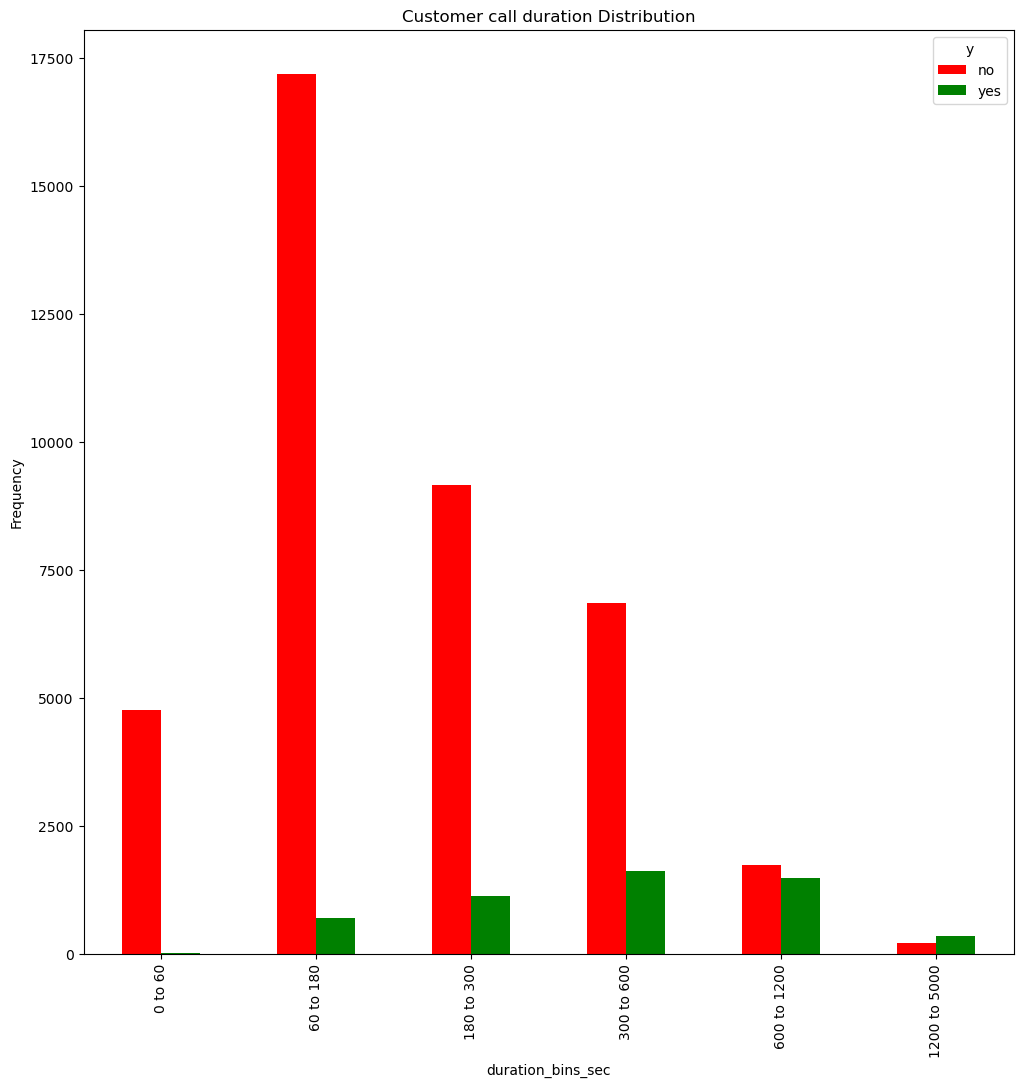

In [85]:
pd.crosstab(data2['duration_bins_sec'],data2['y']).plot(kind="bar",
                                                  figsize=(12,12),color=['red','green'])
plt.title('Customer call duration Distribution')
plt.ylabel('Frequency')

In [86]:
for x in data2['duration_bins_sec'].unique():
  a1=data2[(data2['duration_bins_sec']==x)]['y'].value_counts()
  print("For",x,"range: ",np.round((a1['yes']/(a1['yes']+a1['no']))*100,2))

For 180 to 300 range:  10.92
For 60 to 180 range:  3.91
For 300 to 600 range:  19.15
For 0 to 60 range:  0.19
For 1200 to 5000 range:  61.79
For 600 to 1200 range:  46.04


Whenever the call goes for more than 600 seconds then there were maximum chances that the customer will ssubscribe to the term deposit.

#Comparision age of customers with target variable "deposit"

In [87]:
# Create bins for age column
data2['age_bins']=pd.cut(x=data2['age'], bins=[18,30,40,50,70.5])
data2['age_by_decad'] = pd.cut(x=data2['age'], bins=[18,30,40,50,70.5], labels=['30s', '40s', '50s','70s'])
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_bins_sec,age_bins,age_by_decad
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1.0,-1,0,unknown,no,180 to 300,"(50.0, 70.5]",70s
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1.0,-1,0,unknown,no,60 to 180,"(40.0, 50.0]",50s
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1.0,-1,0,unknown,no,60 to 180,"(30.0, 40.0]",40s
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1.0,-1,0,unknown,no,60 to 180,"(40.0, 50.0]",50s
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1.0,-1,0,unknown,no,180 to 300,"(30.0, 40.0]",40s


Text(0, 0.5, 'Frequency')

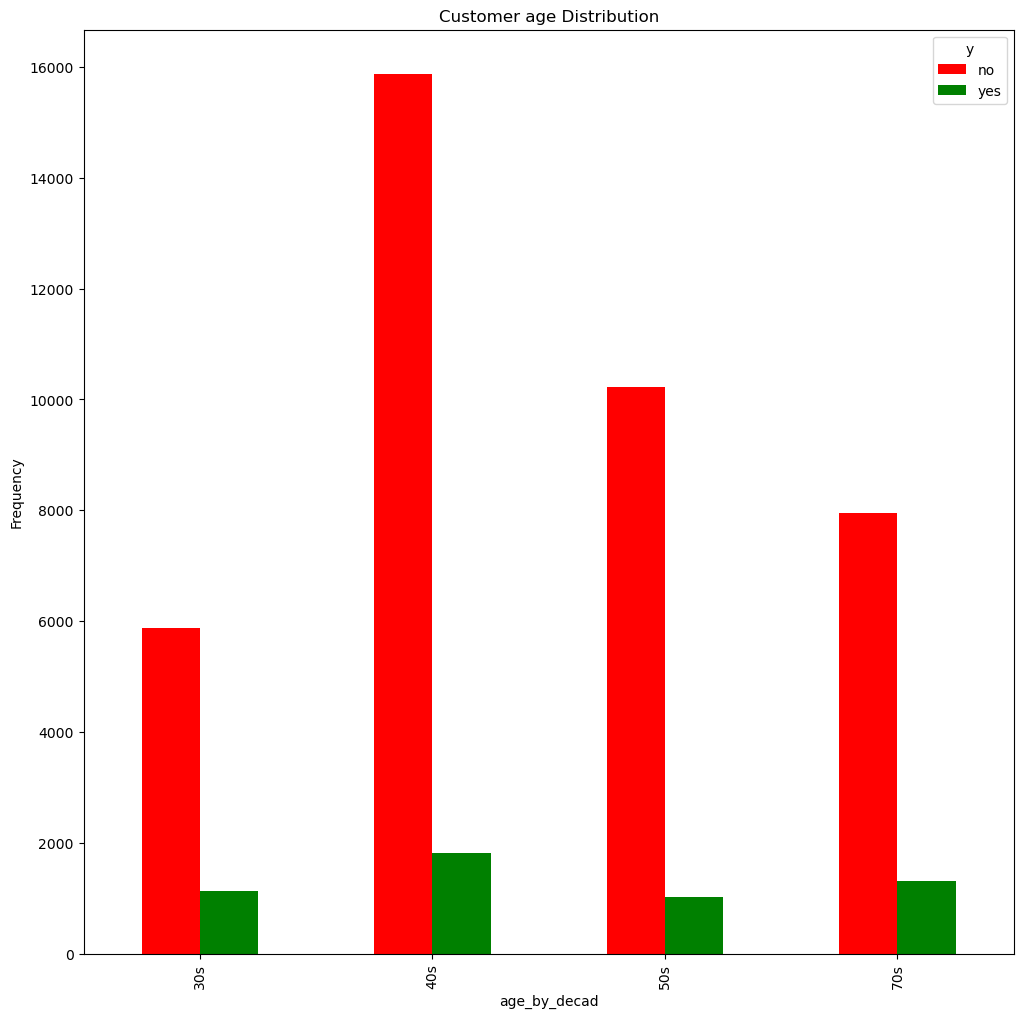

In [88]:
pd.crosstab(data2['age_by_decad'],data2['y']).plot(kind="bar",figsize=(12,12),color=['red','green'])
plt.title('Customer age Distribution')
plt.ylabel('Frequency')

In [89]:
a1 = data2[(data2['age']>18)&(data2['age']<30)]['y'].value_counts()
print("Yes deposit percentage for 18-30 age: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['age']>30)&(data2['age']<40)]['y'].value_counts()
print("Yes deposit percentage for 30-40 age: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['age']>40)&(data2['age']<50)]['y'].value_counts()
print("Yes deposit percentage for 40-50 age: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['age']>50)&(data2['age']<70.5)]['y'].value_counts()
print("Yes deposit percentage for 50-70.5 age: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

Yes deposit percentage for 18-30 age:  17.5062
Yes deposit percentage for 30-40 age:  10.3845
Yes deposit percentage for 40-50 age:  9.1942
Yes deposit percentage for 50-70.5 age:  12.4886


Maximum conversion rate between 18-30 & minimum conversion rate between is 40-50

#Correlation Matrix
A heat map is a two-dimensional representation of data in which values are represented by colors which provides a visual summary of information.

Heat map work with only numerical values

<AxesSubplot:>

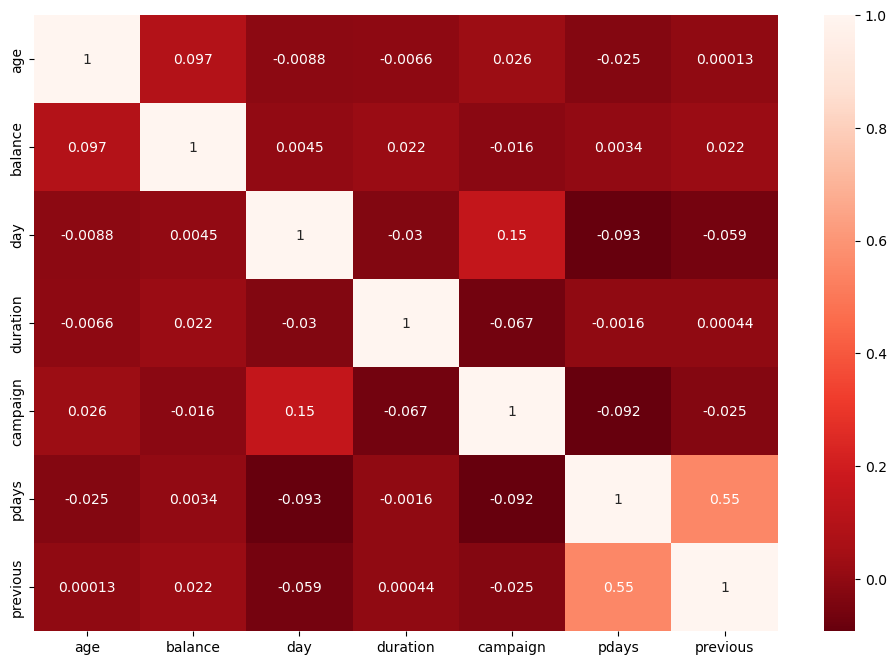

In [90]:
plt.figure(figsize=[12,8])
sns.heatmap(data2.corr(),annot=True,cmap="Reds_r")

# Conclusion

The analysis are the recommendations for future marketing campaigns:

1- Future campaigns should be targeted on customers from age categories between 18 to 30 years old and above 50 years old. Students and Senior citizens have responded more.

2- Whenever customer was contacted 1, 2 or 3 times there were maximum chances that the customer opted for term deposit.

3- Mode of contact should be cellular and telephone.

4- The month of highest level of marketing activity was the month of May. But high deposit rate of customers is in (March, September and October). Campaign highly active in summer time. So, for future campaign marketing activity should be increase in winter season.

5- Call duration highly effect the deposit rate. Deposit rate and call duration is directly proportional. So, when increase call duration deposit rate also increase.Moreover, the call duration exceeds 600sec i.e. 10 minutes, there are high chances that the customer will buy the term deposit.

6- Although married people were targeted more but their rate of conversion is least, so we should target single and divorced people more since their rate of conversion is much better than that of married one.

7- Customers who don't have any housing loan, personal loan and any credit default are the best one to target.

8- Conversion rate of student, unemployed, retired is better than the rest, but high marketing is done on people who have management, technician and blue-collar related jobs.

9- People who have completed their tertiary education respond more for deposit.

# 3.Data-Preprocesing


In [91]:
#why you havent did min max scalling or any scalling----->
#Ans--> becoz we have alreday handle outliers of each attribute...and made those outliers as upper bound so that ther 
#       are in specific range

Encoding:
Encoding is a technique of converting categorical variables into numerical values so that it could be easily fitted to a machine learning model.

In [92]:
#what is diff bet one hot,get dummies,label encoding
#label encoding used when---> responce variable is multi class(more than 2 categoris) or ordinal--> encode categoris in col like 0,1,2,3...
#one hot--> from scikit lib--> used  encode column depending upon the categories in column...no of col==no of categories
#get dummies--> from pandas--> used  encode column depending upon the categories in column...here you can drop first colomn


# Project 4.2(Labelling)

In [93]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from pandas.core.common import random_state
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


In [94]:
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_bins_sec,age_bins,age_by_decad
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1.0,-1,0,unknown,no,180 to 300,"(50.0, 70.5]",70s
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1.0,-1,0,unknown,no,60 to 180,"(40.0, 50.0]",50s
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1.0,-1,0,unknown,no,60 to 180,"(30.0, 40.0]",40s
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1.0,-1,0,unknown,no,60 to 180,"(40.0, 50.0]",50s
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1.0,-1,0,unknown,no,180 to 300,"(30.0, 40.0]",40s


In [95]:
df=data2.copy()
df.drop(['duration_bins_sec','age_bins','age_by_decad'],inplace=True,axis=1)

In [96]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1.0,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1.0,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1.0,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1.0,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1.0,-1,0,unknown,no


In [97]:
label_encoding = {
    "y":{"no":0,"yes":1},
    "poutcome":{"unknown":0,"failure":1,"other":2,"success":3},
    "month":{"jan":0,"feb":1,"mar":2,"apr":3,"may":4,"jun":5,"jul":6,"aug":7,"sep":8,"oct":9,"nov":10,"dec":11},
    "contact":{"unknown":0,"cellular":1,"telephone":2},
    "loan":{"no":0,"yes":1},
    "housing":{"no":0,"yes":1},
    "default":{"no":0,"yes":1},
    "education":{"tertiary":0,"secondary":1,"unknown":2,"primary":3},
    "marital":{"married":0,"single":1,"divorced":2},   
    "job":{"management":0,"technician":1,"entrepreneur":2,"blue-collar":3,"unknown":4,"retired":5,"admin.":6,"services":7,"self-employed":8,"unemployed":9,"housemaid":10,"student":11}
}

In [98]:
df = df.replace(label_encoding)

In [99]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,0,0,0,0,2143,1,0,0,5,4,261,1.0,-1,0,0,0
1,44.0,1,1,1,0,29,1,0,0,5,4,151,1.0,-1,0,0,0
2,33.0,2,0,1,0,2,1,1,0,5,4,76,1.0,-1,0,0,0
3,47.0,3,0,2,0,1506,1,0,0,5,4,92,1.0,-1,0,0,0
4,33.0,4,1,2,0,1,0,0,0,5,4,198,1.0,-1,0,0,0
5,35.0,0,0,0,0,231,1,0,0,5,4,139,1.0,-1,0,0,0
6,28.0,0,1,0,0,447,1,1,0,5,4,217,1.0,-1,0,0,0
7,42.0,2,2,0,1,2,1,0,0,5,4,380,1.0,-1,0,0,0
8,58.0,5,0,3,0,121,1,0,0,5,4,50,1.0,-1,0,0,0
9,43.0,1,1,1,0,593,1,0,0,5,4,55,1.0,-1,0,0,0


In [100]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [101]:
df_yes=df[df['y']==1]

df_no=df[df['y']==0]

In [102]:
from sklearn.model_selection import train_test_split

train_X, test_X= train_test_split(df_yes, test_size=0.427, random_state=2022)

train_X_no, test_X_no= train_test_split(df_no, test_size=0.05665, random_state=2022)

X_train = pd.concat([train_X, train_X_no], axis=0)

X_test= pd.concat([test_X, test_X_no], axis=0)

In [103]:
from sklearn.utils import shuffle

X_train=shuffle(X_train, random_state=2022)
X_test= shuffle(X_test, random_state=2022)

# Save the train and Test file

In [104]:
X_train.to_csv("Train.csv")
X_test.to_csv("Test.csv")

In [105]:
y_train=X_train['y']
X_train.drop('y',axis=1, inplace=True)

y_test=X_test['y']
X_test.drop('y',axis=1, inplace=True)

In [106]:
y_test.value_counts()
#here equal distribution of yes and no in testing 

0    2262
1    2259
Name: y, dtype: int64

In [107]:
X_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [108]:
X_test.duplicated().sum()
#no duplicate values

0

In [109]:
data3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
31966,45.0,admin.,single,secondary,no,946,yes,no,cellular,13,apr,754,3.0,143,6,failure,no
33196,38.0,services,married,secondary,no,797,yes,no,cellular,20,apr,62,4.0,-1,0,unknown,no
33197,25.0,blue-collar,single,unknown,no,586,yes,no,cellular,20,apr,712,1.0,-1,0,unknown,no
33198,30.0,admin.,single,secondary,no,1473,yes,no,cellular,20,apr,401,1.0,-1,0,unknown,no
33199,37.0,admin.,single,secondary,no,515,yes,no,cellular,20,apr,59,1.0,-1,0,unknown,no


Save the train and Test file

<AxesSubplot:title={'center':'After Manipulation(Test)'}, ylabel='y'>

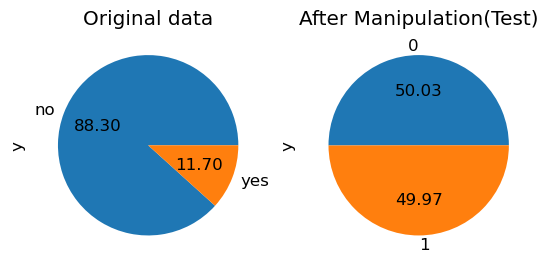

In [110]:
plt.rcParams.update({'font.size': 12})
plt.subplot(1,2,1)
plt.title("Original data")
data3['y'].value_counts().plot.pie(autopct='%.2f')
plt.subplot(1,2,2)
plt.title("After Manipulation(Test)")
y_test.value_counts().plot.pie(autopct='%.2f')

# Oversampling

# SMOTE

Before Oversampling(SMOTE) of training dataset:
 0    37660
1     3030
Name: y, dtype: int64
**************************************************************************
After Oversampling(SMOTE) of training dataset:
 0    37660
1    37660
Name: y, dtype: int64


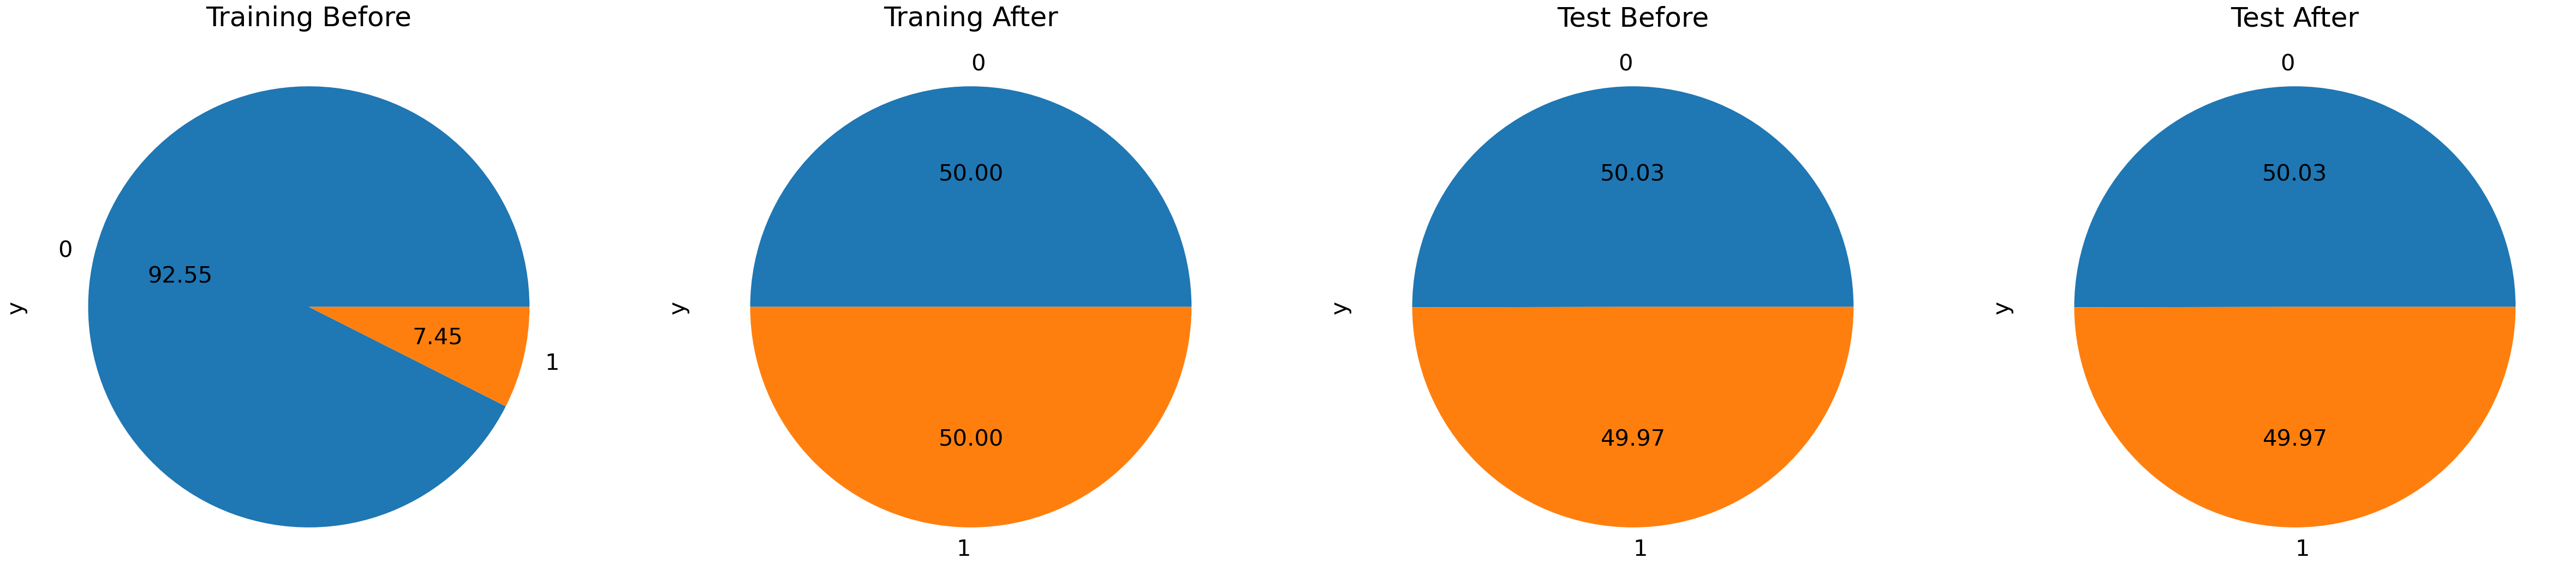

In [111]:
sampler1 = SMOTE(k_neighbors=3)

X_sm, y_sm = sampler1.fit_resample(X_train, y_train)
plt.rcParams.update({'font.size': 30})
plt.figure(figsize=(60, 30))
plt.subplot(1,4,1)
plt.title("Training Before")
y_train.value_counts().plot.pie(autopct='%.2f')
plt.subplot(1,4,2)
plt.title("Traning After")
y_sm.value_counts().plot.pie(autopct='%.2f')
plt.subplot(1,4,3)
plt.title("Test Before")
y_test.value_counts().plot.pie(autopct='%.2f')
plt.subplot(1,4,4)
plt.title("Test After")
y_test.value_counts().plot.pie(autopct='%.2f')
print("Before Oversampling(SMOTE) of training dataset:\n",y_train.value_counts())
print("**************************************************************************")
print("After Oversampling(SMOTE) of training dataset:\n",y_sm.value_counts())

# Save the file After Oversampling

In [112]:
X_sm.to_csv("Train_Oversampling.csv")


# Random forest

In [113]:
randFor=RandomForestClassifier(max_depth=20,n_estimators=401,bootstrap=True,random_state=2023, max_samples=2000)
randFor.fit(X_sm, y_sm)

# y_pred=randFor.predict(X_test)

# print(classification_report(y_test,y_pred))
# print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred)*100,2)))
# print('Precision Score : ' + str(round(precision_score(y_test,y_pred)*100,2)))
# print('Recall Score : ' + str(round(recall_score(y_test,y_pred)*100,2)))
# print('F-Score : ' + str(round(f1_score(y_test,y_pred)*100,2)))

RandomForestClassifier(max_depth=20, max_samples=2000, n_estimators=401,
                       random_state=2023)

In [109]:
fileName='RFClassifier'
pkl.dump(randFor,open(fileName,'wb'))

In [118]:
def compressed_pickle(title,data):
    with bz2.BZ2File(title+'.pbz2','w')as f:
        pkl.dump(data,f)
        
    

In [119]:
compr_rf='RFCompressed'

In [120]:
compressed_pickle(compr_rf,randFor)

# Gradient Boost Classifier

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(n_estimators=100, random_state=2023, learning_rate=0.1)
gb_clf.fit(X_sm, y_sm)

y_pred=gb_clf.predict(X_test)

print(classification_report(y_test,y_pred))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred)*100,2)))


              precision    recall  f1-score   support

           0       0.72      0.91      0.80      2262
           1       0.88      0.64      0.74      2259

    accuracy                           0.78      4521
   macro avg       0.80      0.78      0.77      4521
weighted avg       0.80      0.78      0.77      4521

Accuracy Score : 77.66
Precision Score : 88.15
Recall Score : 63.88
F-Score : 74.08


# KNN

In [122]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=15, metric='euclidean', n_jobs=-1, p=2)
knn.fit(X_sm, y_sm)

y_pred=knn.predict(X_test)

print(classification_report(y_test,y_pred))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred)*100,2)))


              precision    recall  f1-score   support

           0       0.72      0.77      0.74      2262
           1       0.75      0.69      0.72      2259

    accuracy                           0.73      4521
   macro avg       0.73      0.73      0.73      4521
weighted avg       0.73      0.73      0.73      4521

Accuracy Score : 73.24
Precision Score : 75.28
Recall Score : 69.15
F-Score : 72.08


C:\Users\utkar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# ada boost

In [123]:
from sklearn.ensemble import AdaBoostClassifier

randFor=RandomForestClassifier(max_depth=20,n_estimators=401,bootstrap=True,random_state=2023, max_samples=2000)

adamodel = AdaBoostClassifier(base_estimator=randFor, n_estimators=25, learning_rate = 0.1)
adamodel.fit(X_sm, y_sm)

y_pred=adamodel.predict(X_test)

print(classification_report(y_test,y_pred))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred)*100,2)))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82      2262
           1       0.88      0.69      0.78      2259

    accuracy                           0.80      4521
   macro avg       0.82      0.80      0.80      4521
weighted avg       0.82      0.80      0.80      4521

Accuracy Score : 80.23
Precision Score : 88.49
Recall Score : 69.46
F-Score : 77.83


In [124]:
compr_ada='AdaCompressed'

In [125]:
compressed_pickle(compr_ada,adamodel)

In [126]:
# fileName1='AdaBoostClassifier'
# pkl.dump(adamodel,open(fileName1,'wb'))

In [127]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier

# # randFor=RandomForestClassifier(max_depth=20,n_estimators=401,bootstrap=True,random_state=2022, max_samples=2000)
# # num_trees = 100

# model = BaggingClassifier(base_estimator=adamodel, n_estimators=100, random_state=2023)
# model.fit(X_sm, y_sm)

# y_pred=model.predict(X_test)

# print(classification_report(y_test,y_pred))
# print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred)*100,2)))
# print('Precision Score : ' + str(round(precision_score(y_test,y_pred)*100,2)))
# print('Recall Score : ' + str(round(recall_score(y_test,y_pred)*100,2)))
# print('F-Score : ' + str(round(f1_score(y_test,y_pred)*100,2)))

# Logistic regession

In [128]:
from sklearn.linear_model import LogisticRegression

lor=LogisticRegression(penalty='l2', C=100, random_state=2023, n_jobs=-1)

lor.fit(X_sm, y_sm)

y_pred=lor.predict(X_test)

print(classification_report(y_test,y_pred))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred)*100,2)))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      2262
           1       0.81      0.72      0.76      2259

    accuracy                           0.78      4521
   macro avg       0.78      0.78      0.77      4521
weighted avg       0.78      0.78      0.77      4521

Accuracy Score : 77.53
Precision Score : 80.81
Recall Score : 72.16
F-Score : 76.24


In [129]:
compr_lor='LORCompressed'

In [130]:
compressed_pickle(compr_lor,lor)

In [131]:
# fileName3='LogisticRegression'
# pkl.dump(lor,open(fileName3,'wb'))

In [132]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# xg boost

In [133]:
from pandas.core.common import random_state
from xgboost import XGBClassifier

xg=XGBClassifier(random_state=2023)

xg.fit(X_sm, y_sm)

y_pred=xg.predict(X_test)

print(classification_report(y_test,y_pred))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred)*100,2)))

              precision    recall  f1-score   support

           0       0.62      0.96      0.75      2262
           1       0.91      0.41      0.56      2259

    accuracy                           0.68      4521
   macro avg       0.76      0.68      0.66      4521
weighted avg       0.76      0.68      0.66      4521

Accuracy Score : 68.24
Precision Score : 90.54
Recall Score : 40.68
F-Score : 56.14


# random forest with xg boost

In [134]:
from xgboost import XGBClassifier, XGBRFClassifier

xgrf=XGBRFClassifier(n_estimators=2000, subsample=0.9, colsample_bynode=0.2,random_state=2023)

xgrf.fit(X_sm, y_sm)

y_pred=xgrf.predict(X_test)

print(classification_report(y_test,y_pred))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred)*100,2)))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      2262
           1       0.83      0.71      0.77      2259

    accuracy                           0.78      4521
   macro avg       0.79      0.78      0.78      4521
weighted avg       0.79      0.78      0.78      4521

Accuracy Score : 78.46
Precision Score : 83.48
Recall Score : 70.92
F-Score : 76.69


# Voting Classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
eclf1 = VotingClassifier(estimators=[('lor', lor), ('randFor', randFor),('adamodel',adamodel)], voting='soft')
eclf1.fit(X_sm, y_sm)

y_pred=eclf1.predict(X_test)

print(classification_report(y_test,y_pred))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred)*100,2)))


              precision    recall  f1-score   support

           0       0.77      0.89      0.82      2262
           1       0.87      0.73      0.79      2259

    accuracy                           0.81      4521
   macro avg       0.82      0.81      0.81      4521
weighted avg       0.82      0.81      0.81      4521

Accuracy Score : 80.89
Precision Score : 86.81
Recall Score : 72.82
F-Score : 79.2


In [136]:
compr_vot='VotCompressed'

In [137]:
compressed_pickle(compr_vot,eclf1)

In [138]:
fileName4='VotingClassifier'
pkl.dump(eclf1,open(fileName4,'wb'))